In [1]:
%load_ext wurlitzer
import glob
import os
import numpy as np
from xspec import *
from stingray import Lightcurve
from astropy.io import fits
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12,8]

Fit.statMethod = "chi"
Fit.nIterations = 100000
Fit.delta = 1e-4
Fit.criticalDelta = 1e-4
os.chdir('other_obs')


1 spectrum  in use
 
Spectral Data File: 0405640601_PN13grpspec.fits  Spectrum 1
Net count rate (cts/s) for Spectrum:1  3.499e-03 +/- 9.739e-04 (51.2 % total)
 Assigned to Data Group 1 and Plot Group 1
  Noticed Channels:  1-4
  Telescope: XMM Instrument: EPN  Channel Type: PI
  Exposure Time: 1.054e+04 sec
 Using fit statistic: chi
 Using Background File                0405640601_PN13spec_bkg.fits
  Background Exposure Time: 1.054e+04 sec
 Using Response (RMF) File            0405640601_PN13spec.rmf for Source 1
 Using Auxiliary Response (ARF) File  0405640601_PN13spec.arf



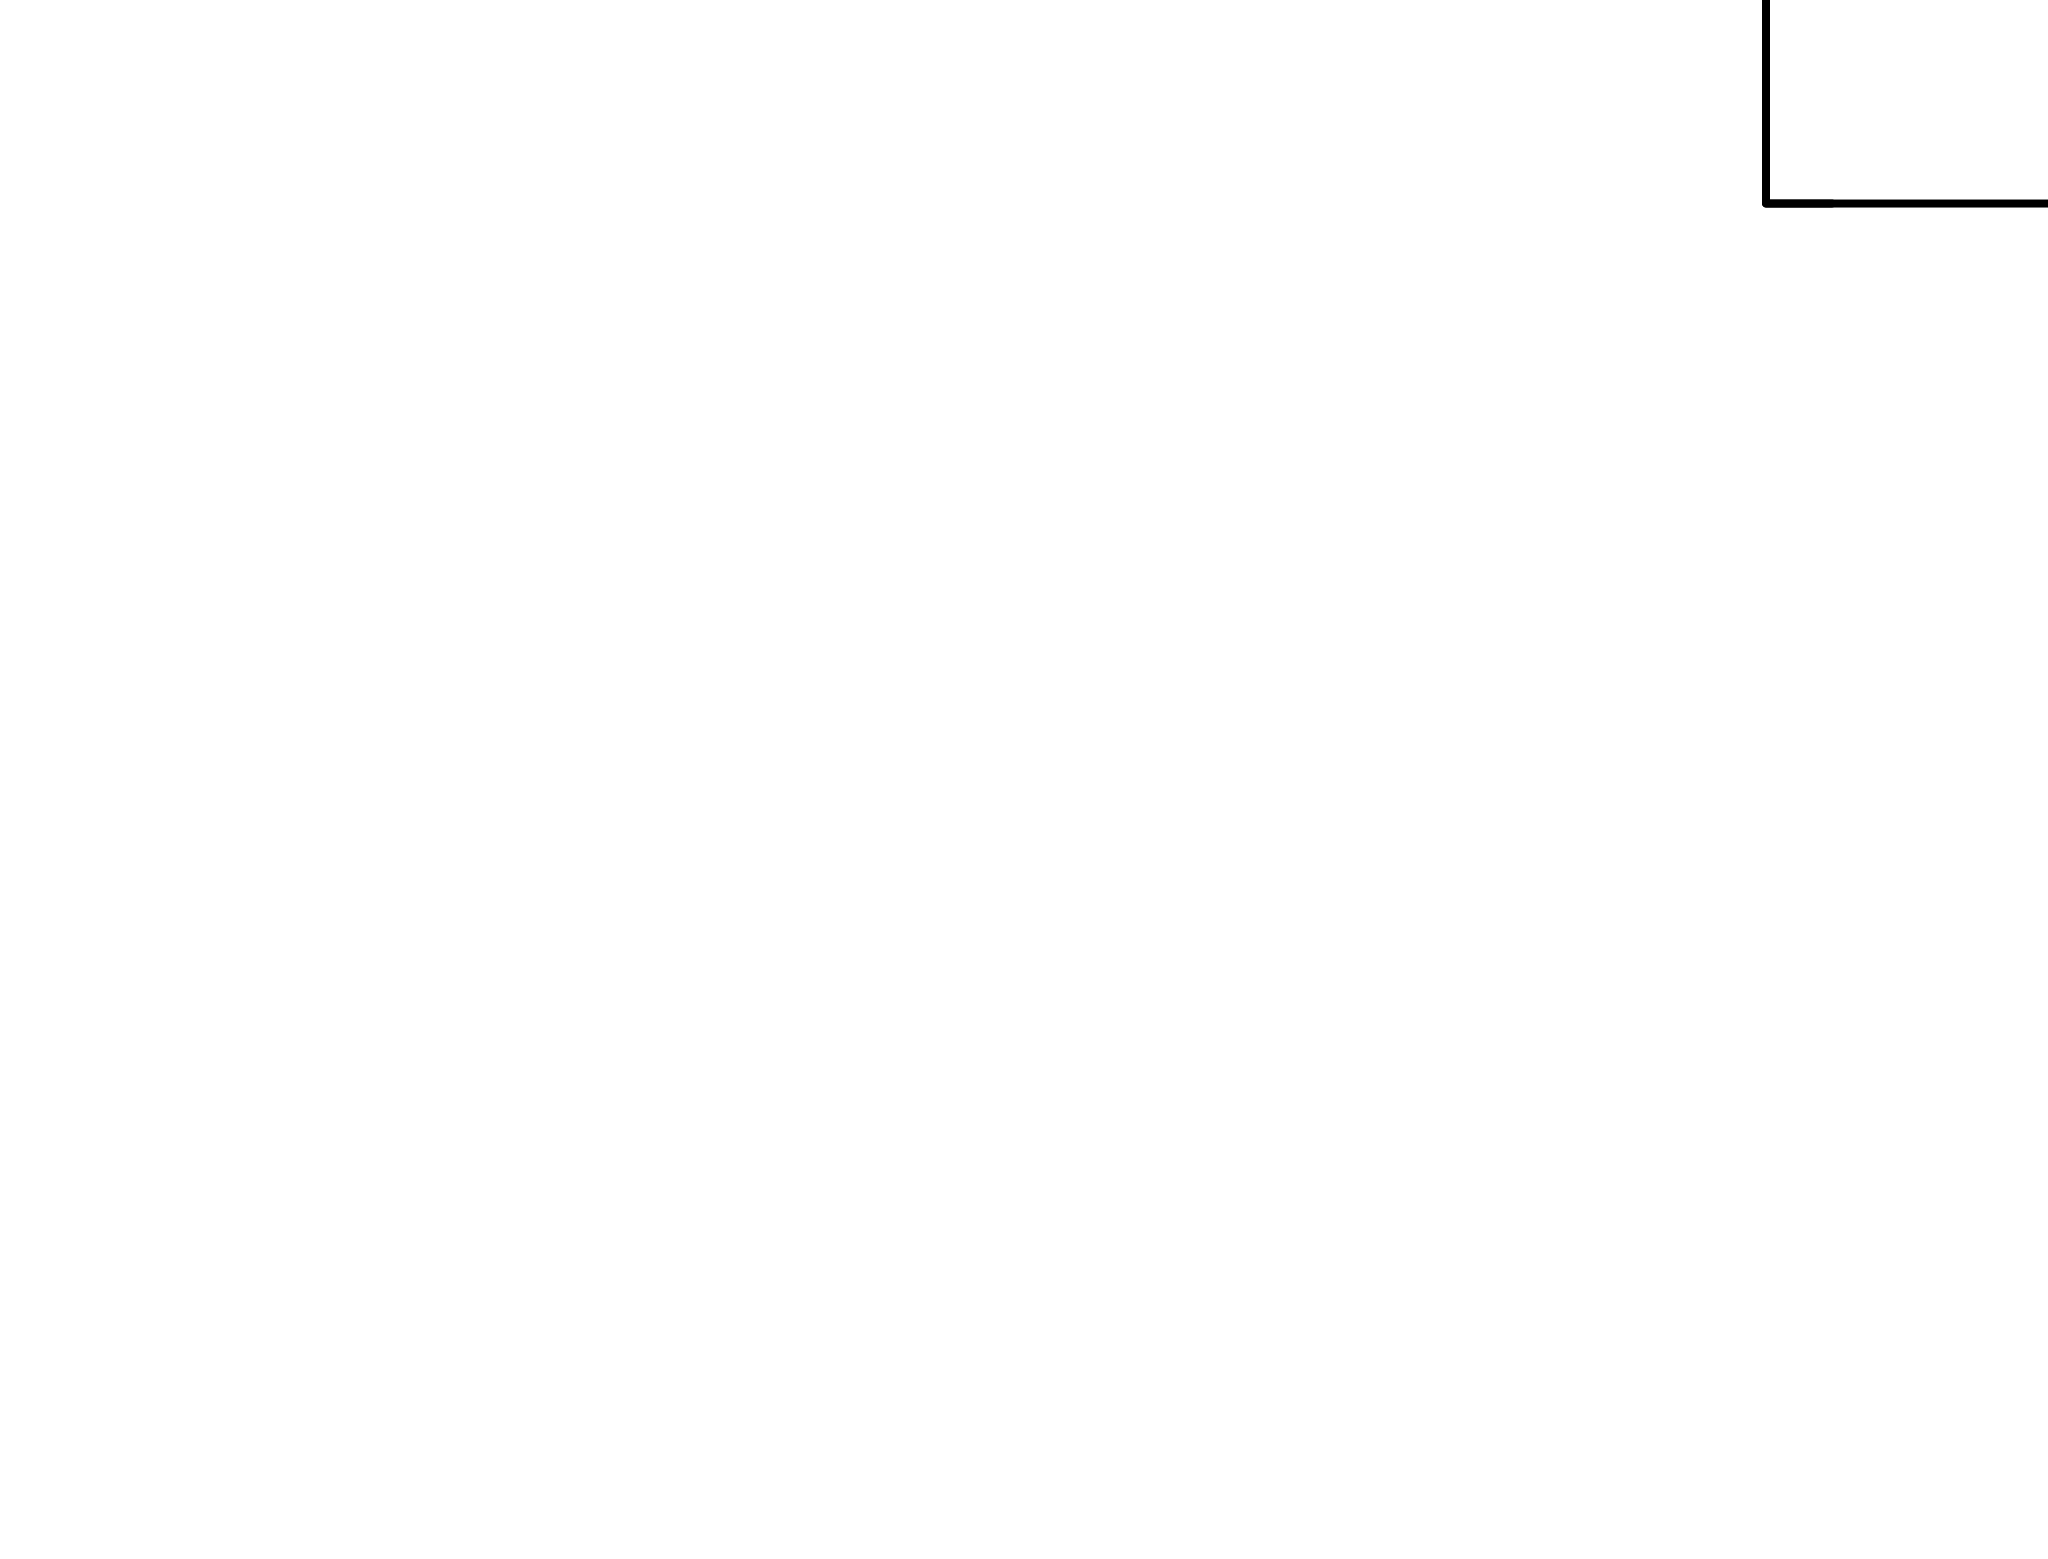

In [2]:
spec_files = sorted(glob.glob("*grpspec.fits"))
spec = Spectrum(spec_files[0])

Plot.device="/svg"
Plot.xAxis="keV"
Plot.xLog=True
Plot.yLog=True
Plot.addCommand("Rescale Y 0.00001 0.001")
Plot("data")
#spec.ignore("**-0.2 12.0-**")

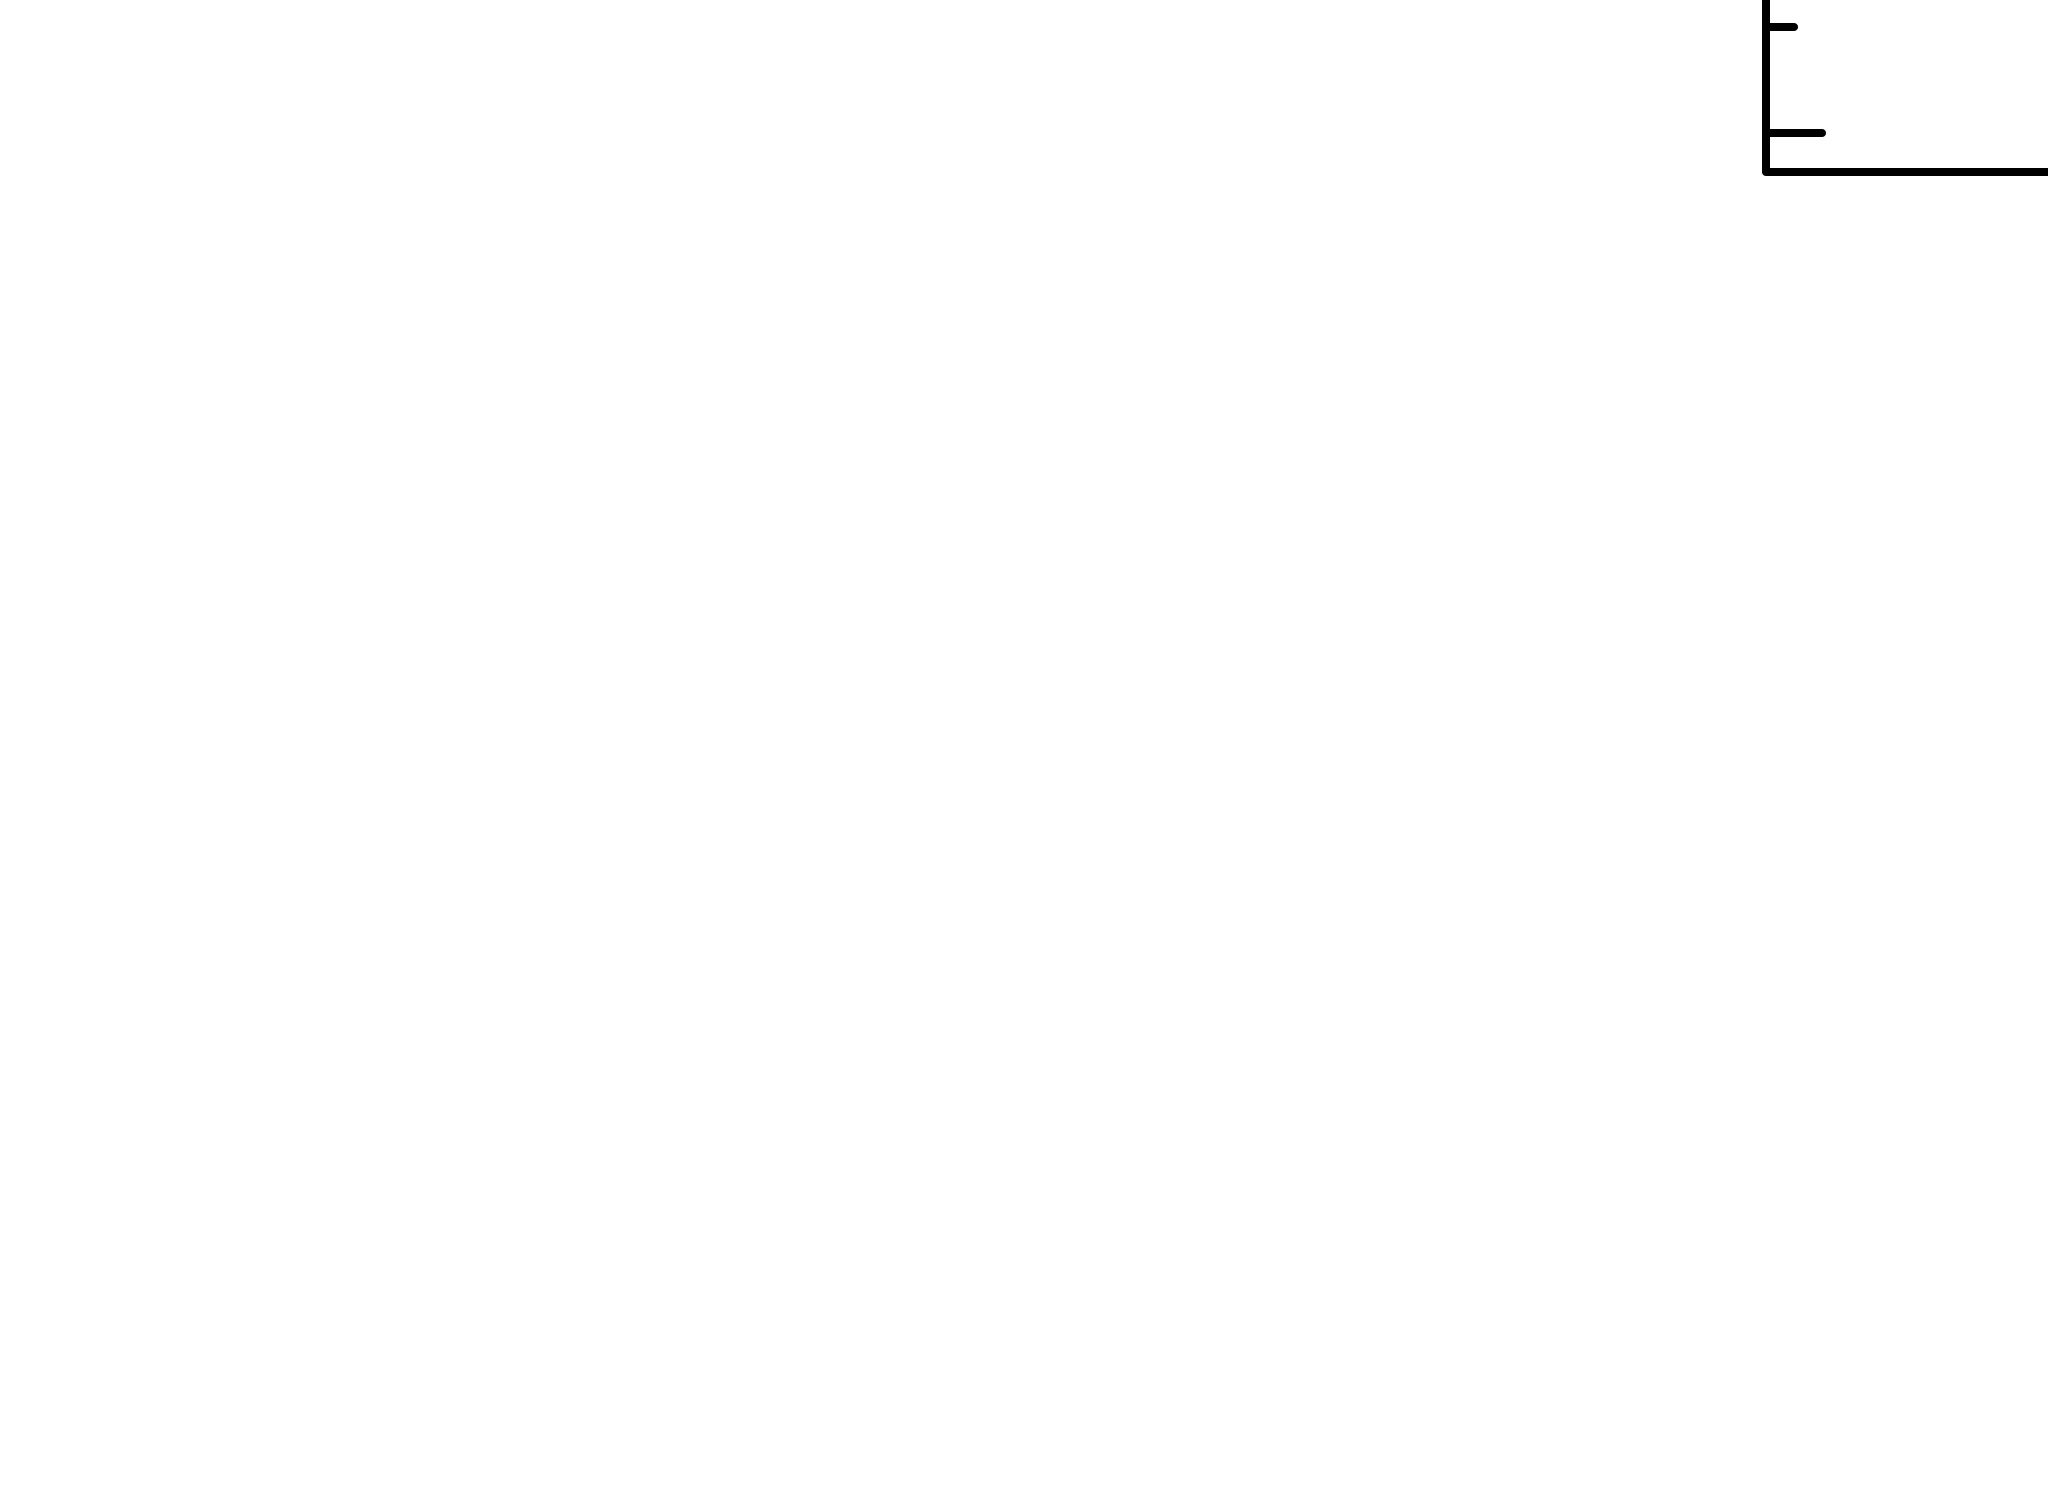


Model TBabs<1>*bbody<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   bbody      kT         keV      3.00000      +/-  0.0          
   3    2   bbody      norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : Chi-Squared              6.118226e+11     using 4 bins.

Test statistic : Chi-Squared              6.118226e+11     using 4 bins.
 Null hypothesis probability of 0.000000e+00 with 1 degrees of freedom
 Current data and model not fit yet.
                                   Parameters
Chi-Squared  |beta|/N    Lvl          1:nH          2:kT        3:norm
4.57023      0.296297     -1       1.75245       3.63795   6.11060e-06
3.74267      73610        -1       3.31739       4.06630   9.01078e-06
3.05344      49855.7      -1       5.82503       4.32358   1.24652e-05
2.64

In [5]:
AllModels.clear()
mo = Model("tbabs*bbody")
Fit.perform()
Plot("data resid")

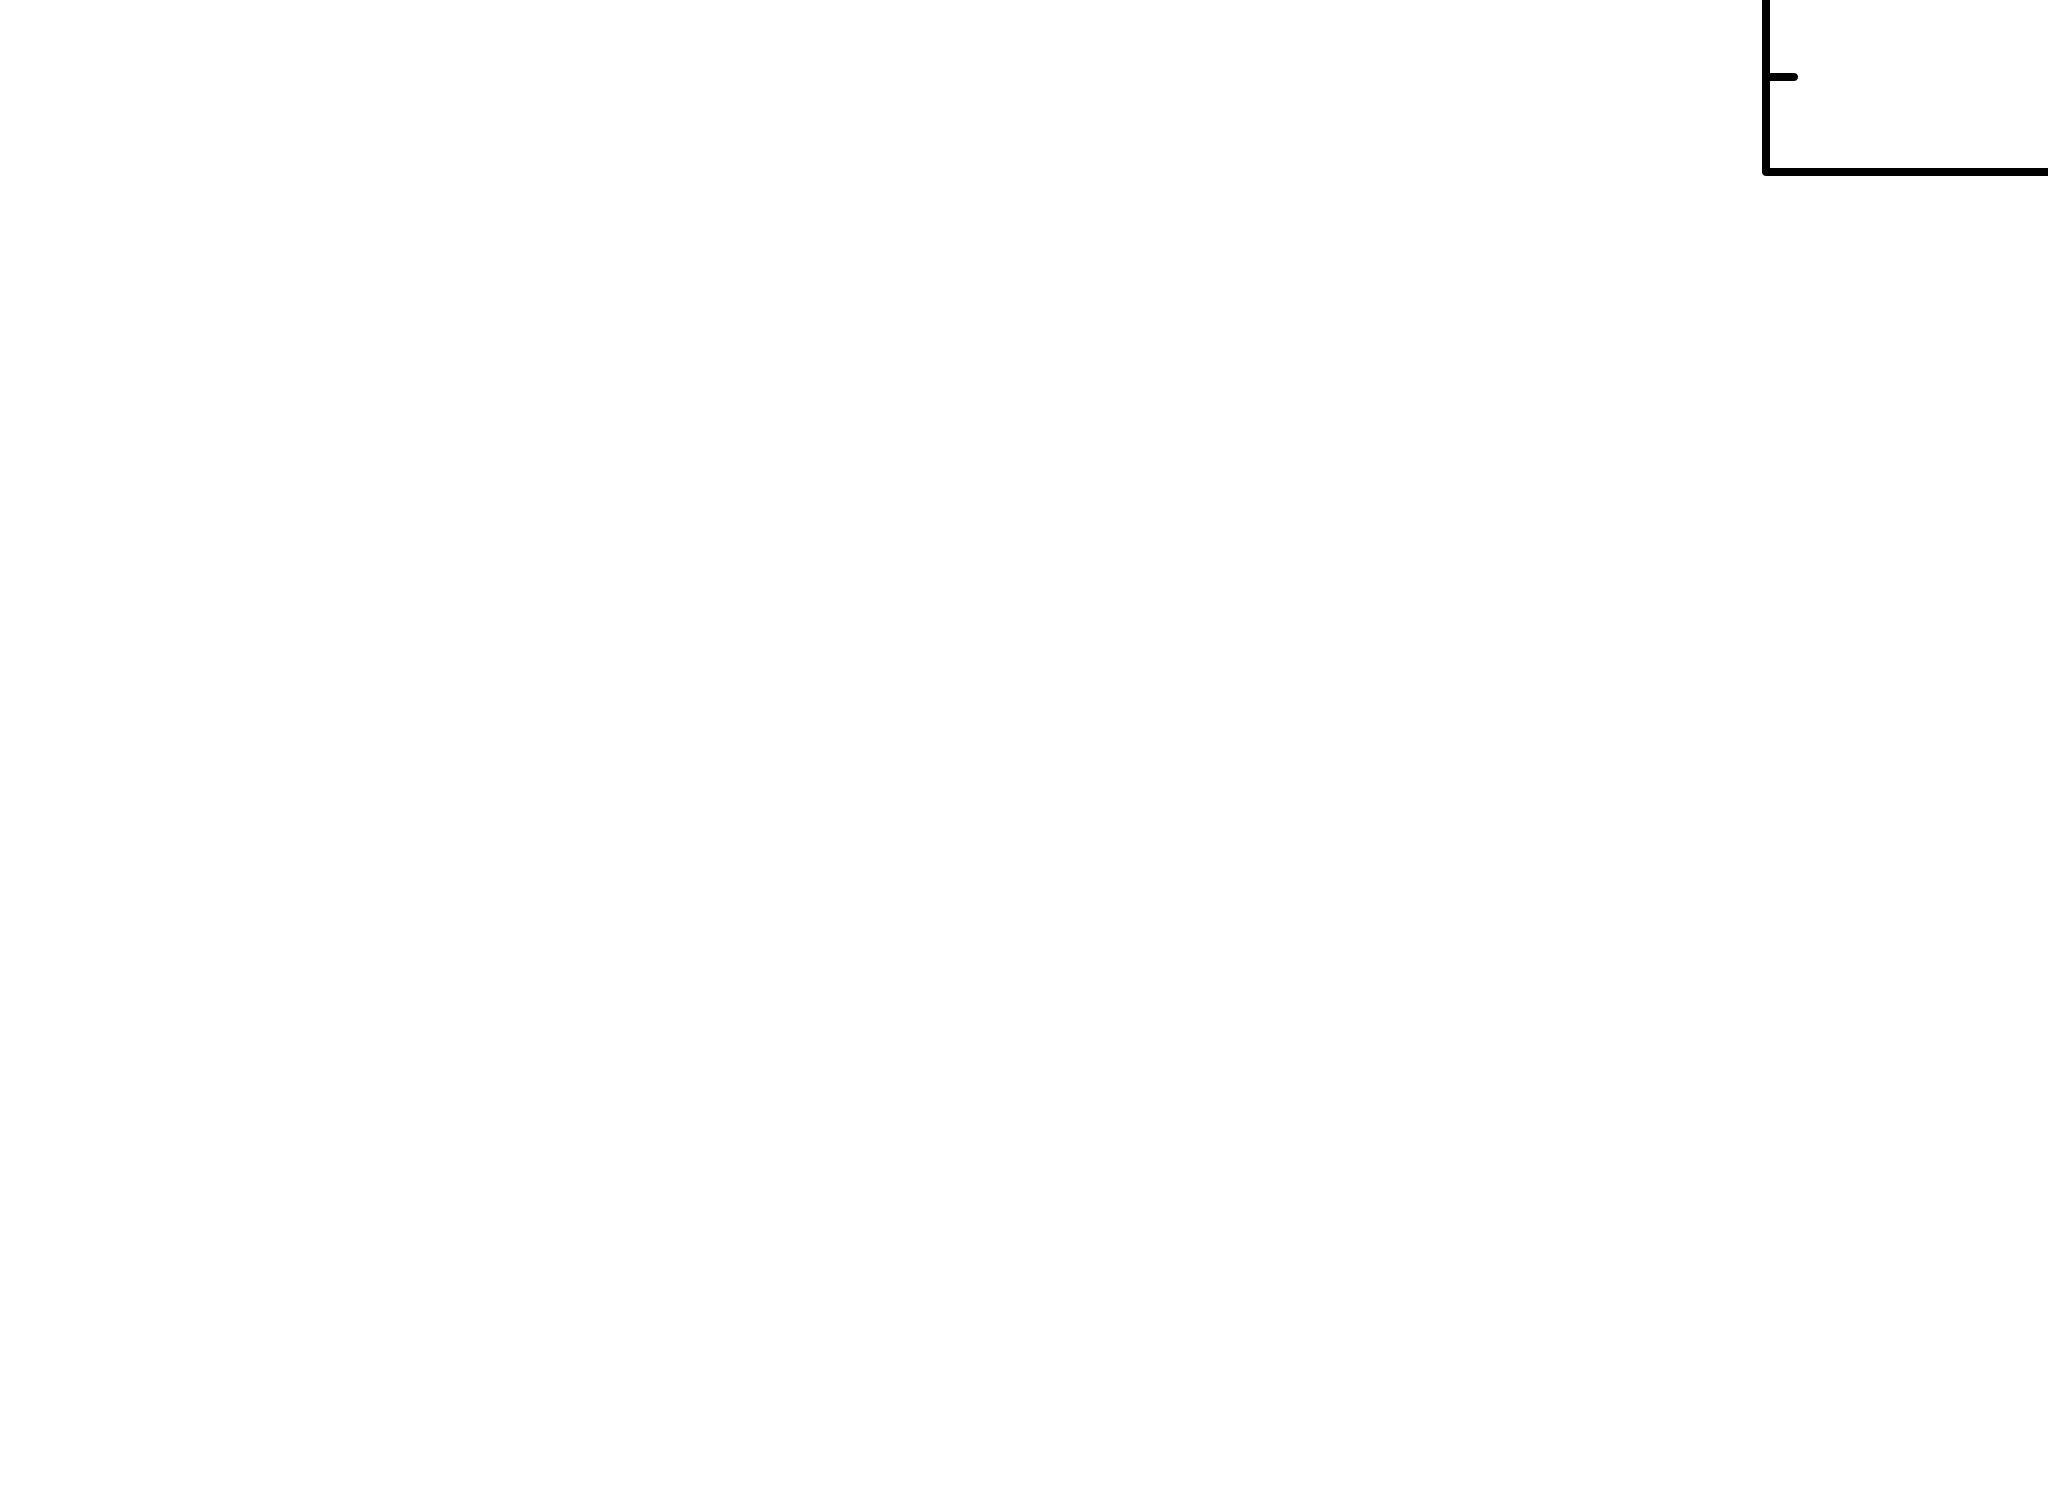


Model TBabs<1>*bremss<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   bremss     kT         keV      7.00000      +/-  0.0          
   3    2   bremss     norm                1.00000      +/-  0.0          
________________________________________________________________________

tbvabs Version 2.3
Cosmic absorption with grains and H2, modified from
Wilms, Allen, & McCray, 2000, ApJ 542, 914-924
Questions: Joern Wilms
joern.wilms@sternwarte.uni-erlangen.de
joern.wilms@fau.de

http://pulsar.sternwarte.uni-erlangen.de/wilms/research/tbabs/

PLEASE NOTICE:
To get the model described by the above paper
you will also have to set the abundances:
   abund wilm

Note that this routine ignores the current cross section setting
as it always HAS to use the Verner cross sections as a baseline.

Fit statistic  : Chi-Squared              3.510904e+10     using 4 bins.

Te

In [3]:
AllModels.clear()
mo = Model("tbabs*bremss")
Fit.perform()
Plot("data resid")


Model TBabs<1>*apec<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   apec       kT         keV      1.00000      +/-  0.0          
   3    2   apec       Abundanc            1.00000      frozen
   4    2   apec       Redshift            0.0          frozen
   5    2   apec       norm                1.00000      +/-  0.0          
________________________________________________________________________

Reading APEC data from 3.0.9


Fit statistic  : Chi-Squared              1.099443e+10     using 4 bins.

Test statistic : Chi-Squared              1.099443e+10     using 4 bins.
 Null hypothesis probability of 0.000000e+00 with 1 degrees of freedom
 Current data and model not fit yet.
                                   Parameters
Chi-Squared  |beta|/N    Lvl          1:nH          2:kT        5:norm
15.1313      0.109794     -3      0.429873       15.6905   3.3

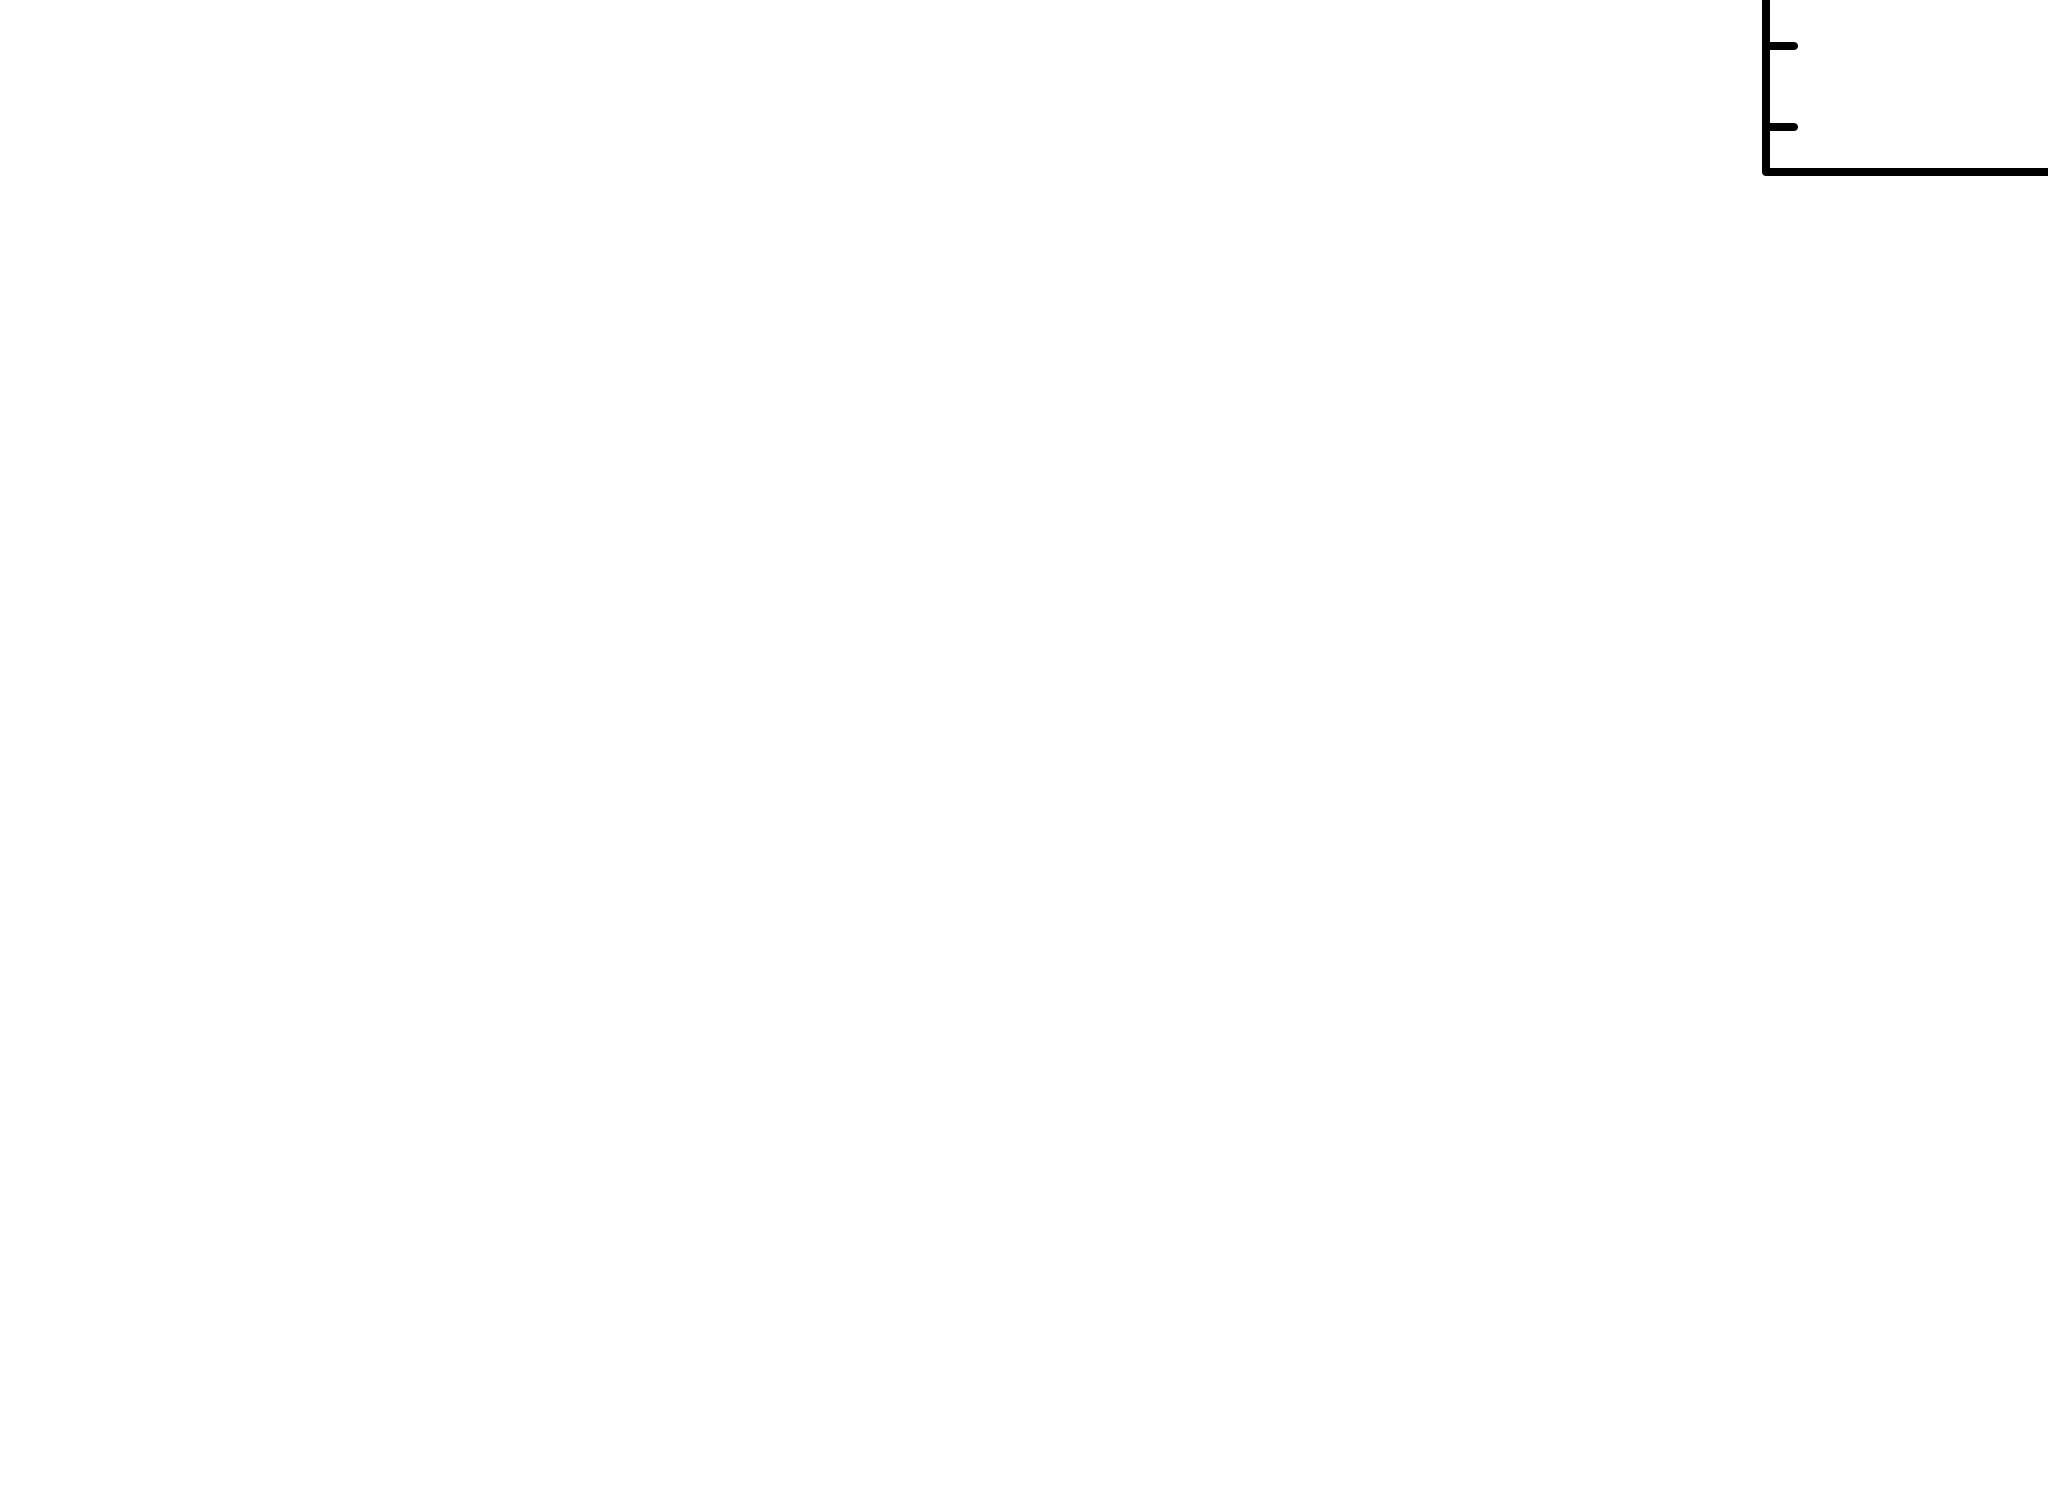

In [4]:
AllModels.clear()
mo = Model("tbabs*apec")
Fit.perform()
Plot("data resid")

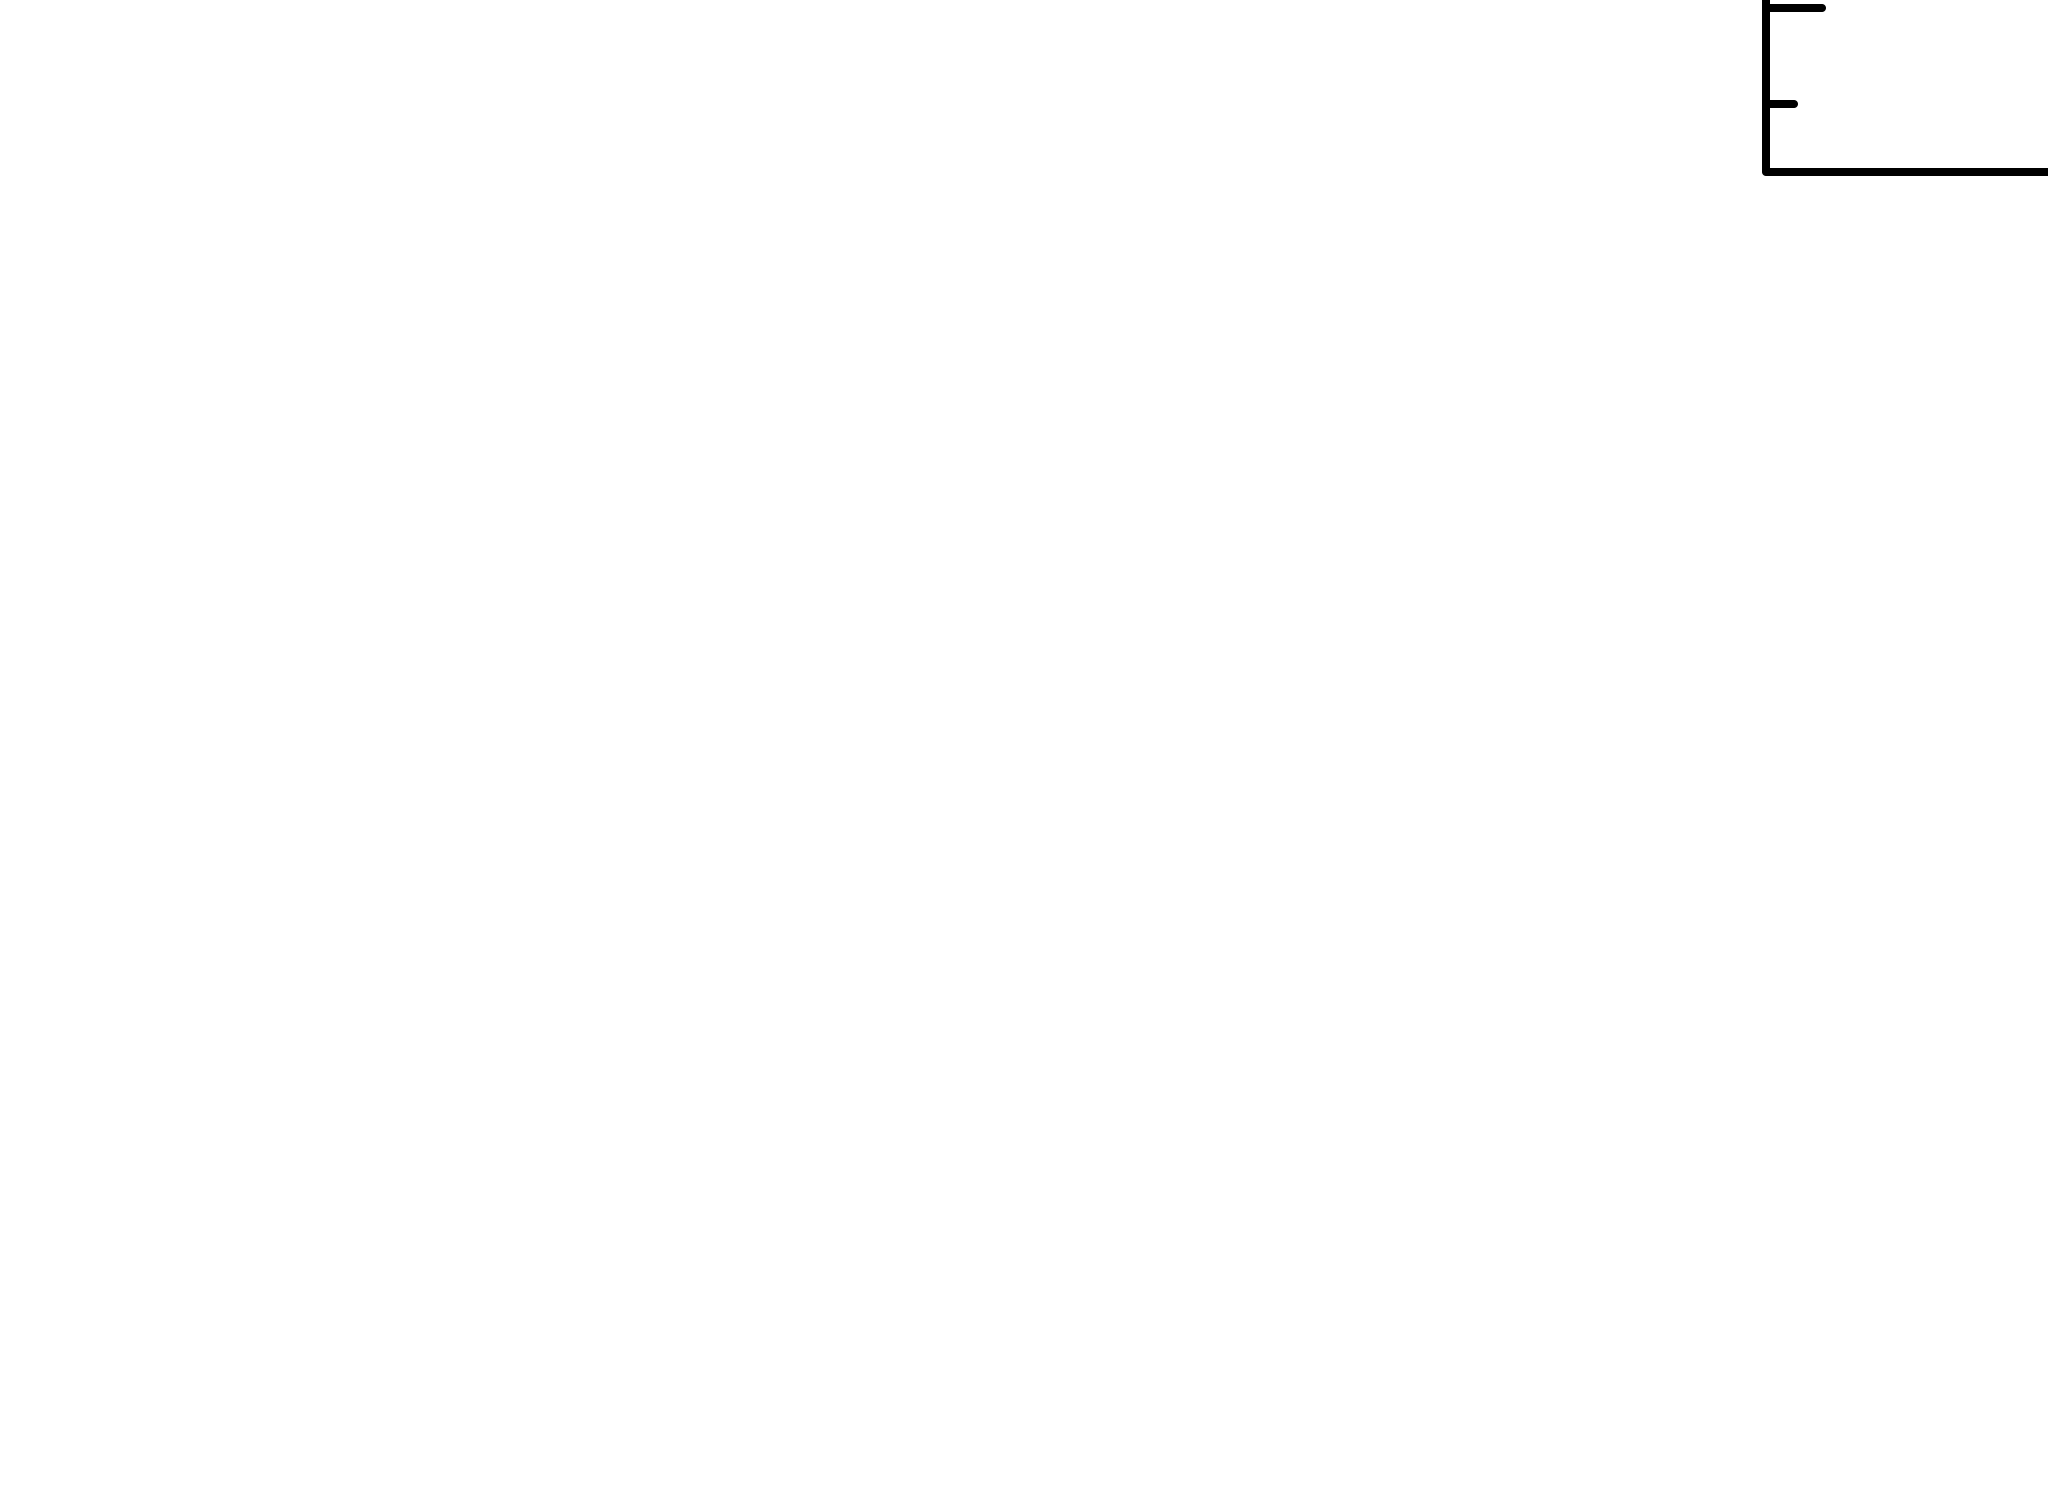


Model TBabs<1>*powerlaw<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   powerlaw   PhoIndex            1.00000      +/-  0.0          
   3    2   powerlaw   norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : Chi-Squared              1.826278e+11     using 4 bins.

Test statistic : Chi-Squared              1.826278e+11     using 4 bins.
 Null hypothesis probability of 0.000000e+00 with 1 degrees of freedom
 Current data and model not fit yet.
                                   Parameters
Chi-Squared  |beta|/N    Lvl          1:nH    2:PhoIndex        3:norm
5.87309      0.836684     -1       1.68930      0.315594   3.35633e-06
3.65523      88988.7      -1       2.88667    -0.0929022   2.37051e-06
1.23418      63710.5      -2       2.17159      -1.07591   5.41297e-07
1

In [6]:
AllModels.clear()
mo = Model("tbabs*powerlaw")
Fit.perform()
Plot("data resid")

In [7]:
AllModels.calcFlux(".2 12.0")

 Model Flux 4.7038e-05 photons (6.7127e-13 ergs/cm^2/s) range (0.20000 - 12.000 keV)



1 spectrum  in use
 
Spectral Data File: 0405640701_MOS15grpspec.fits  Spectrum 1
Net count rate (cts/s) for Spectrum:1  2.286e-03 +/- 6.859e-04 (23.8 % total)
 Assigned to Data Group 1 and Plot Group 1
  Noticed Channels:  1-14
  Telescope: XMM Instrument: EPIC  Channel Type: PI
  Exposure Time: 2.236e+04 sec
 Using fit statistic: chi
 Using Background File                0405640701_MOS15spec_bkg.fits
  Background Exposure Time: 2.236e+04 sec
 Using Response (RMF) File            0405640701_MOS15spec.rmf for Source 1



***Error: Requested ARF extension not found in 0405640701_MOS15spec.arf


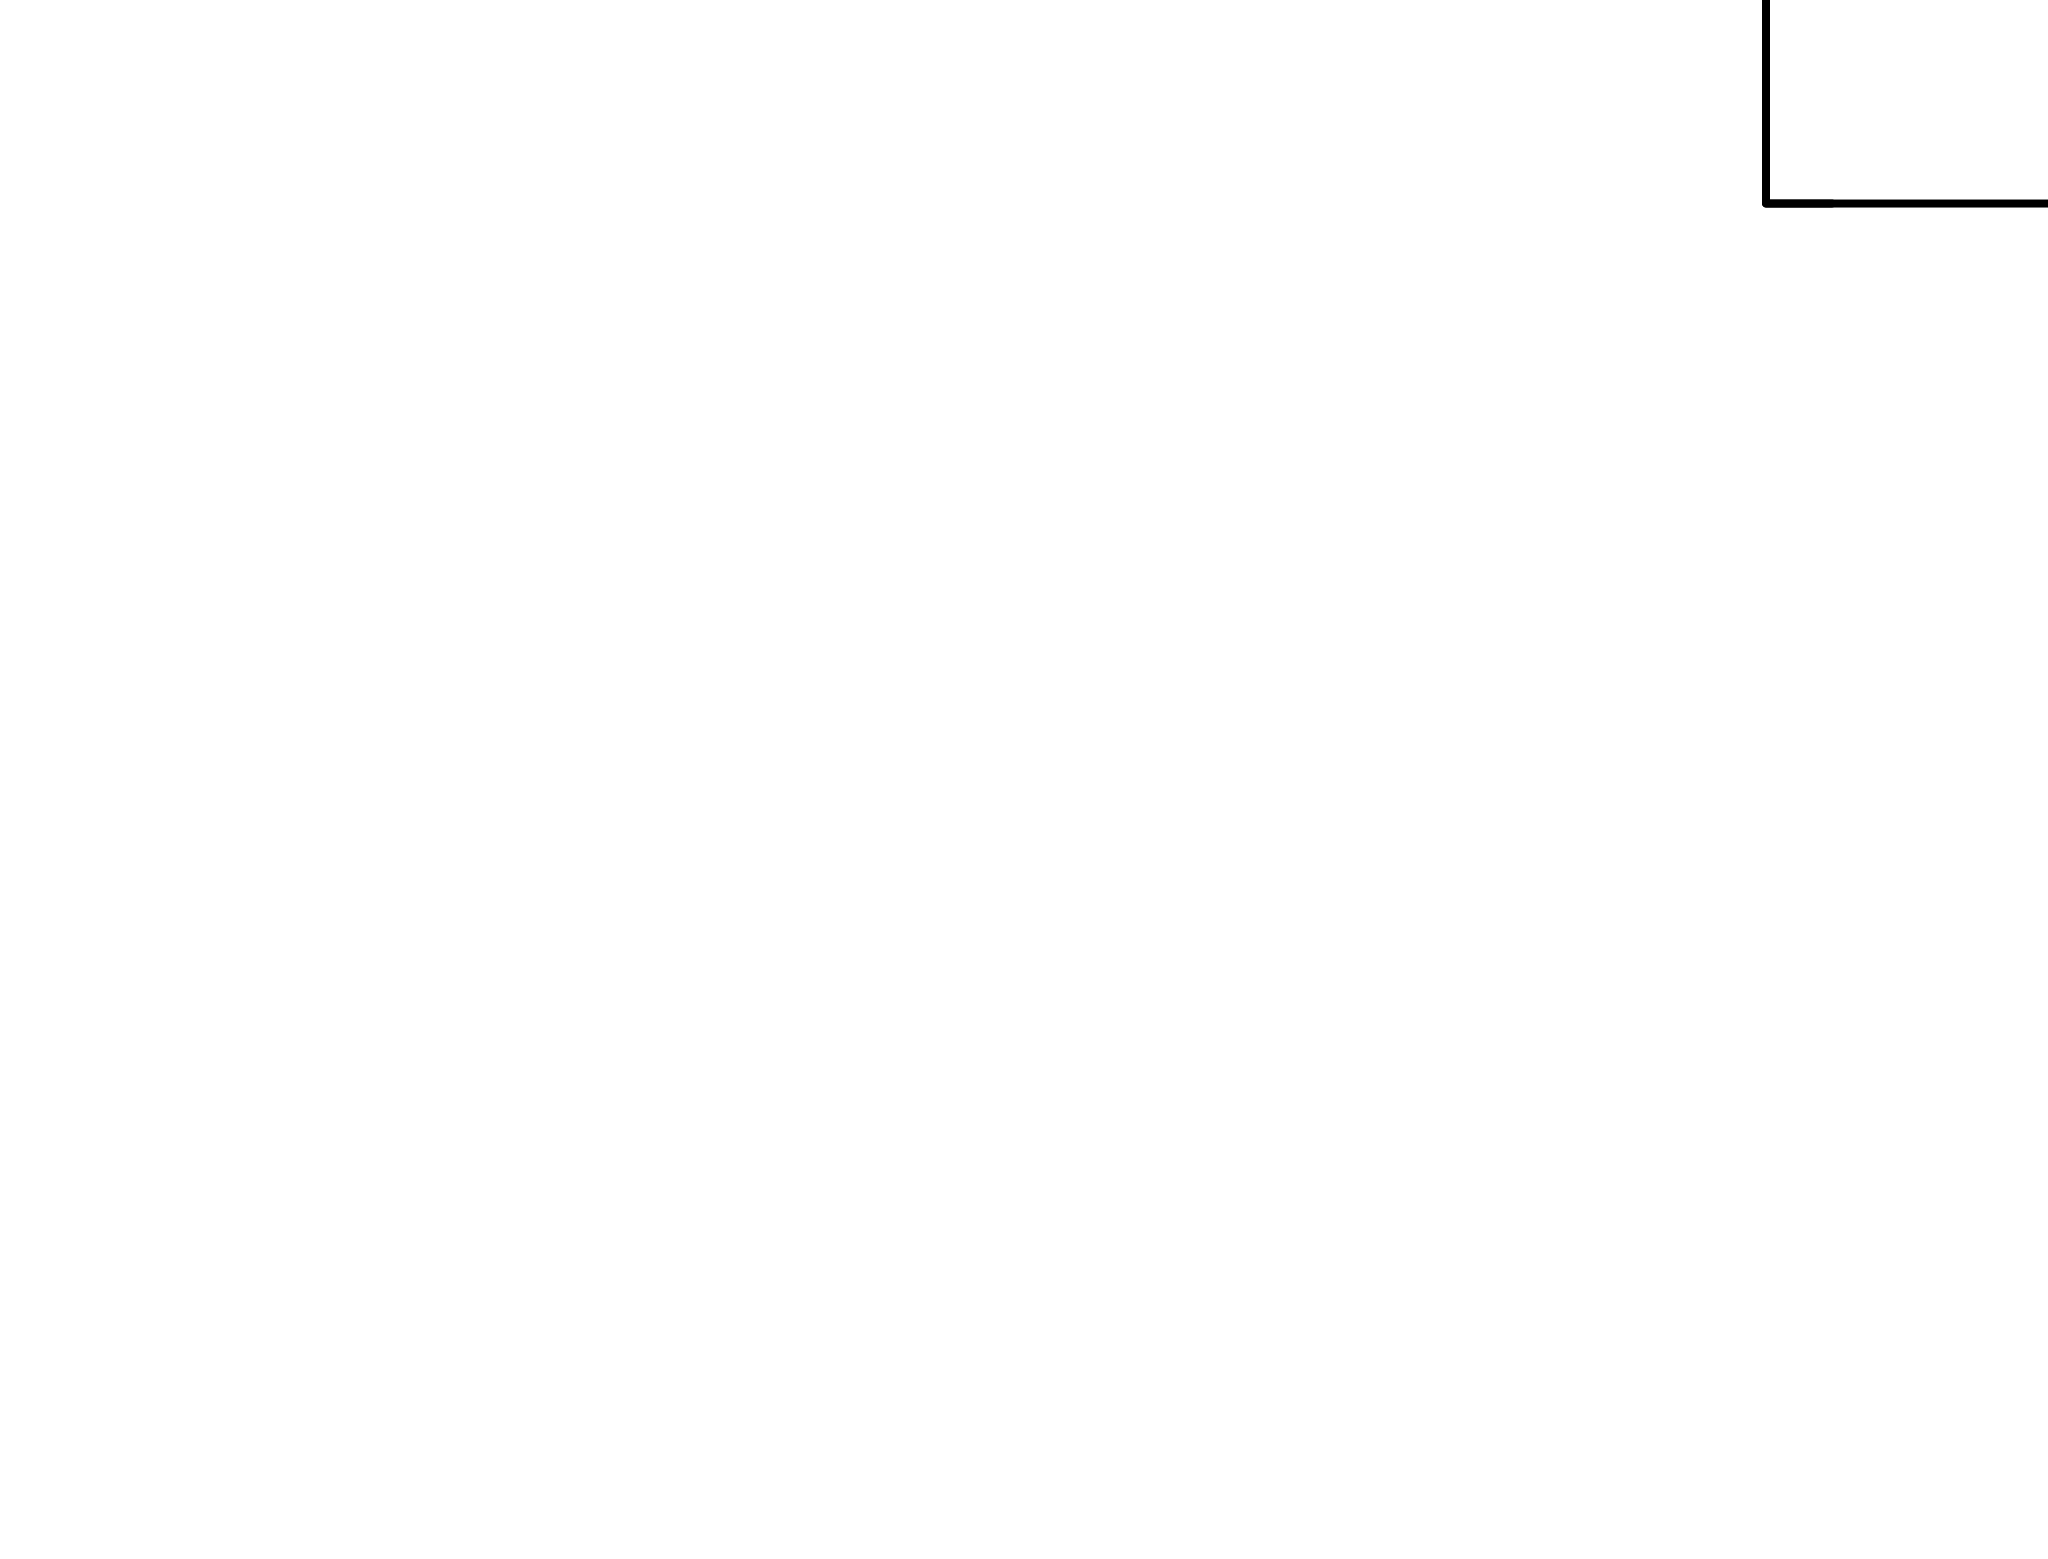

     1 channels (1) ignored in spectrum #     1
      No channels ignored (no channels in specified range)



In [8]:
AllData.clear()
AllModels.clear()
spec = Spectrum(spec_files[1])

Plot.device="/svg"
Plot.xAxis="keV"
Plot.xLog=True
Plot.yLog=True
Plot.addCommand("Rescale Y 0.00001 0.001")
Plot("data")
spec.ignore("**-0.2 12.0-**")


Model TBabs<1>*powerlaw<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   powerlaw   PhoIndex            1.00000      +/-  0.0          
   3    2   powerlaw   norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : Chi-Squared              2.274193e+11     using 13 bins.

Test statistic : Chi-Squared              2.274193e+11     using 13 bins.
 Null hypothesis probability of 0.000000e+00 with 10 degrees of freedom
 Current data and model not fit yet.
                                   Parameters
Chi-Squared  |beta|/N    Lvl          1:nH    2:PhoIndex        3:norm
8.55487      1.41014      -1       2.36630      0.293737   4.98368e-06
8.44518      113566       -2       5.49374      0.885813   1.02631e-05
7.00085      113174 

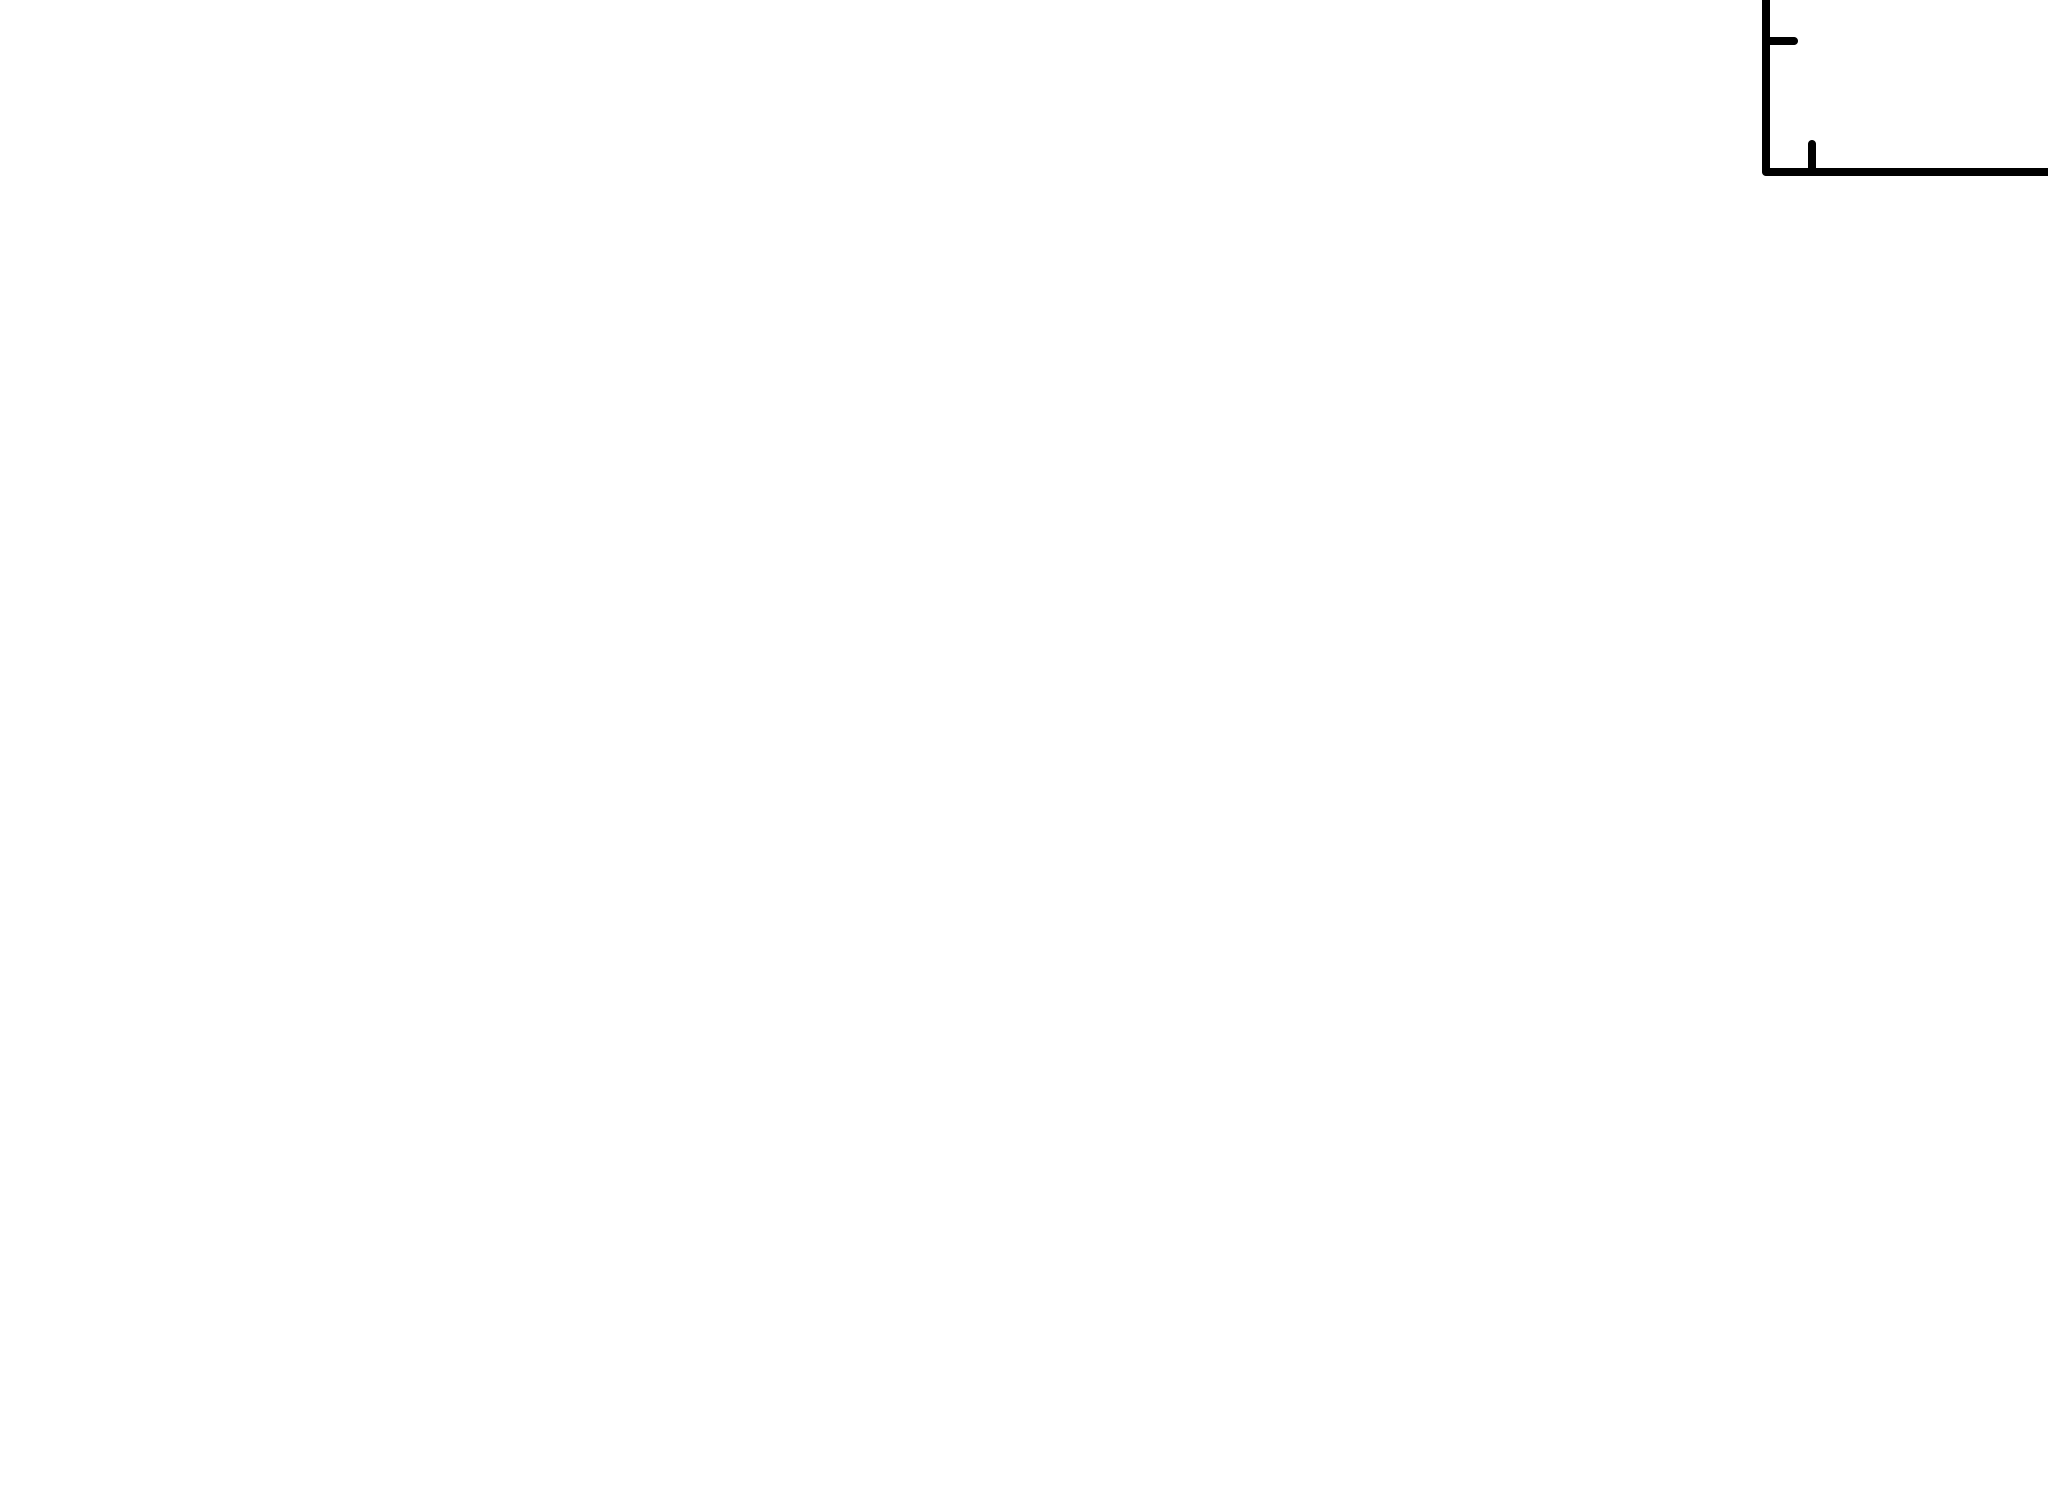

      -1       5.72532      0.836356   1.37187e-05
6.93344      3357.46      -1       5.92114      0.901627   1.51958e-05
6.87127      6502.7       -1       6.12865      0.960090   1.68433e-05
6.81441      5807.43      -1       6.32935       1.01550   1.85879e-05
6.76246      4960.5       -1       6.52379       1.06837   2.04220e-05
6.71487      4249.15      -1       6.71209       1.11893   2.23445e-05
6.67114      3662.45      -1       6.89459       1.16735   2.43546e-05
6.63085      3176.02      -1       7.07157       1.21379   2.64519e-05
6.59364      2769.83      -1       7.24332       1.25838   2.86355e-05
6.55919      2428.3       -1       7.41009       1.30126   3.09047e-05
6.52722      2139.3       -1       7.57211       1.34253   3.32588e-05
6.4975       1893.3       -1       7.72962       1.38229   3.56967e-05
6.46981      1682.71      -1       7.88282       1.42065   3.82175e-05
6.44397      1501.52      -1       8.03190       1.45768   4.08203e-05
6.41982      1344.84      

In [9]:
AllModels.clear()
mo = Model("tbabs*powerlaw")
Fit.perform()
Plot("data resid")


Model TBabs<1>*bremss<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   bremss     kT         keV      7.00000      +/-  0.0          
   3    2   bremss     norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : Chi-Squared              4.799654e+10     using 13 bins.

Test statistic : Chi-Squared              4.799654e+10     using 13 bins.
 Null hypothesis probability of 0.000000e+00 with 10 degrees of freedom
 Current data and model not fit yet.
                                   Parameters
Chi-Squared  |beta|/N    Lvl          1:nH          2:kT        3:norm
17.3934      0.667504      0       1.53780       33.3600   8.53744e-06
11.9475      85067.2      -1       5.79947       152.526   3.04429e-05
11.5655      45652.6      -2       10.6216       45.9699   3.55187e-05


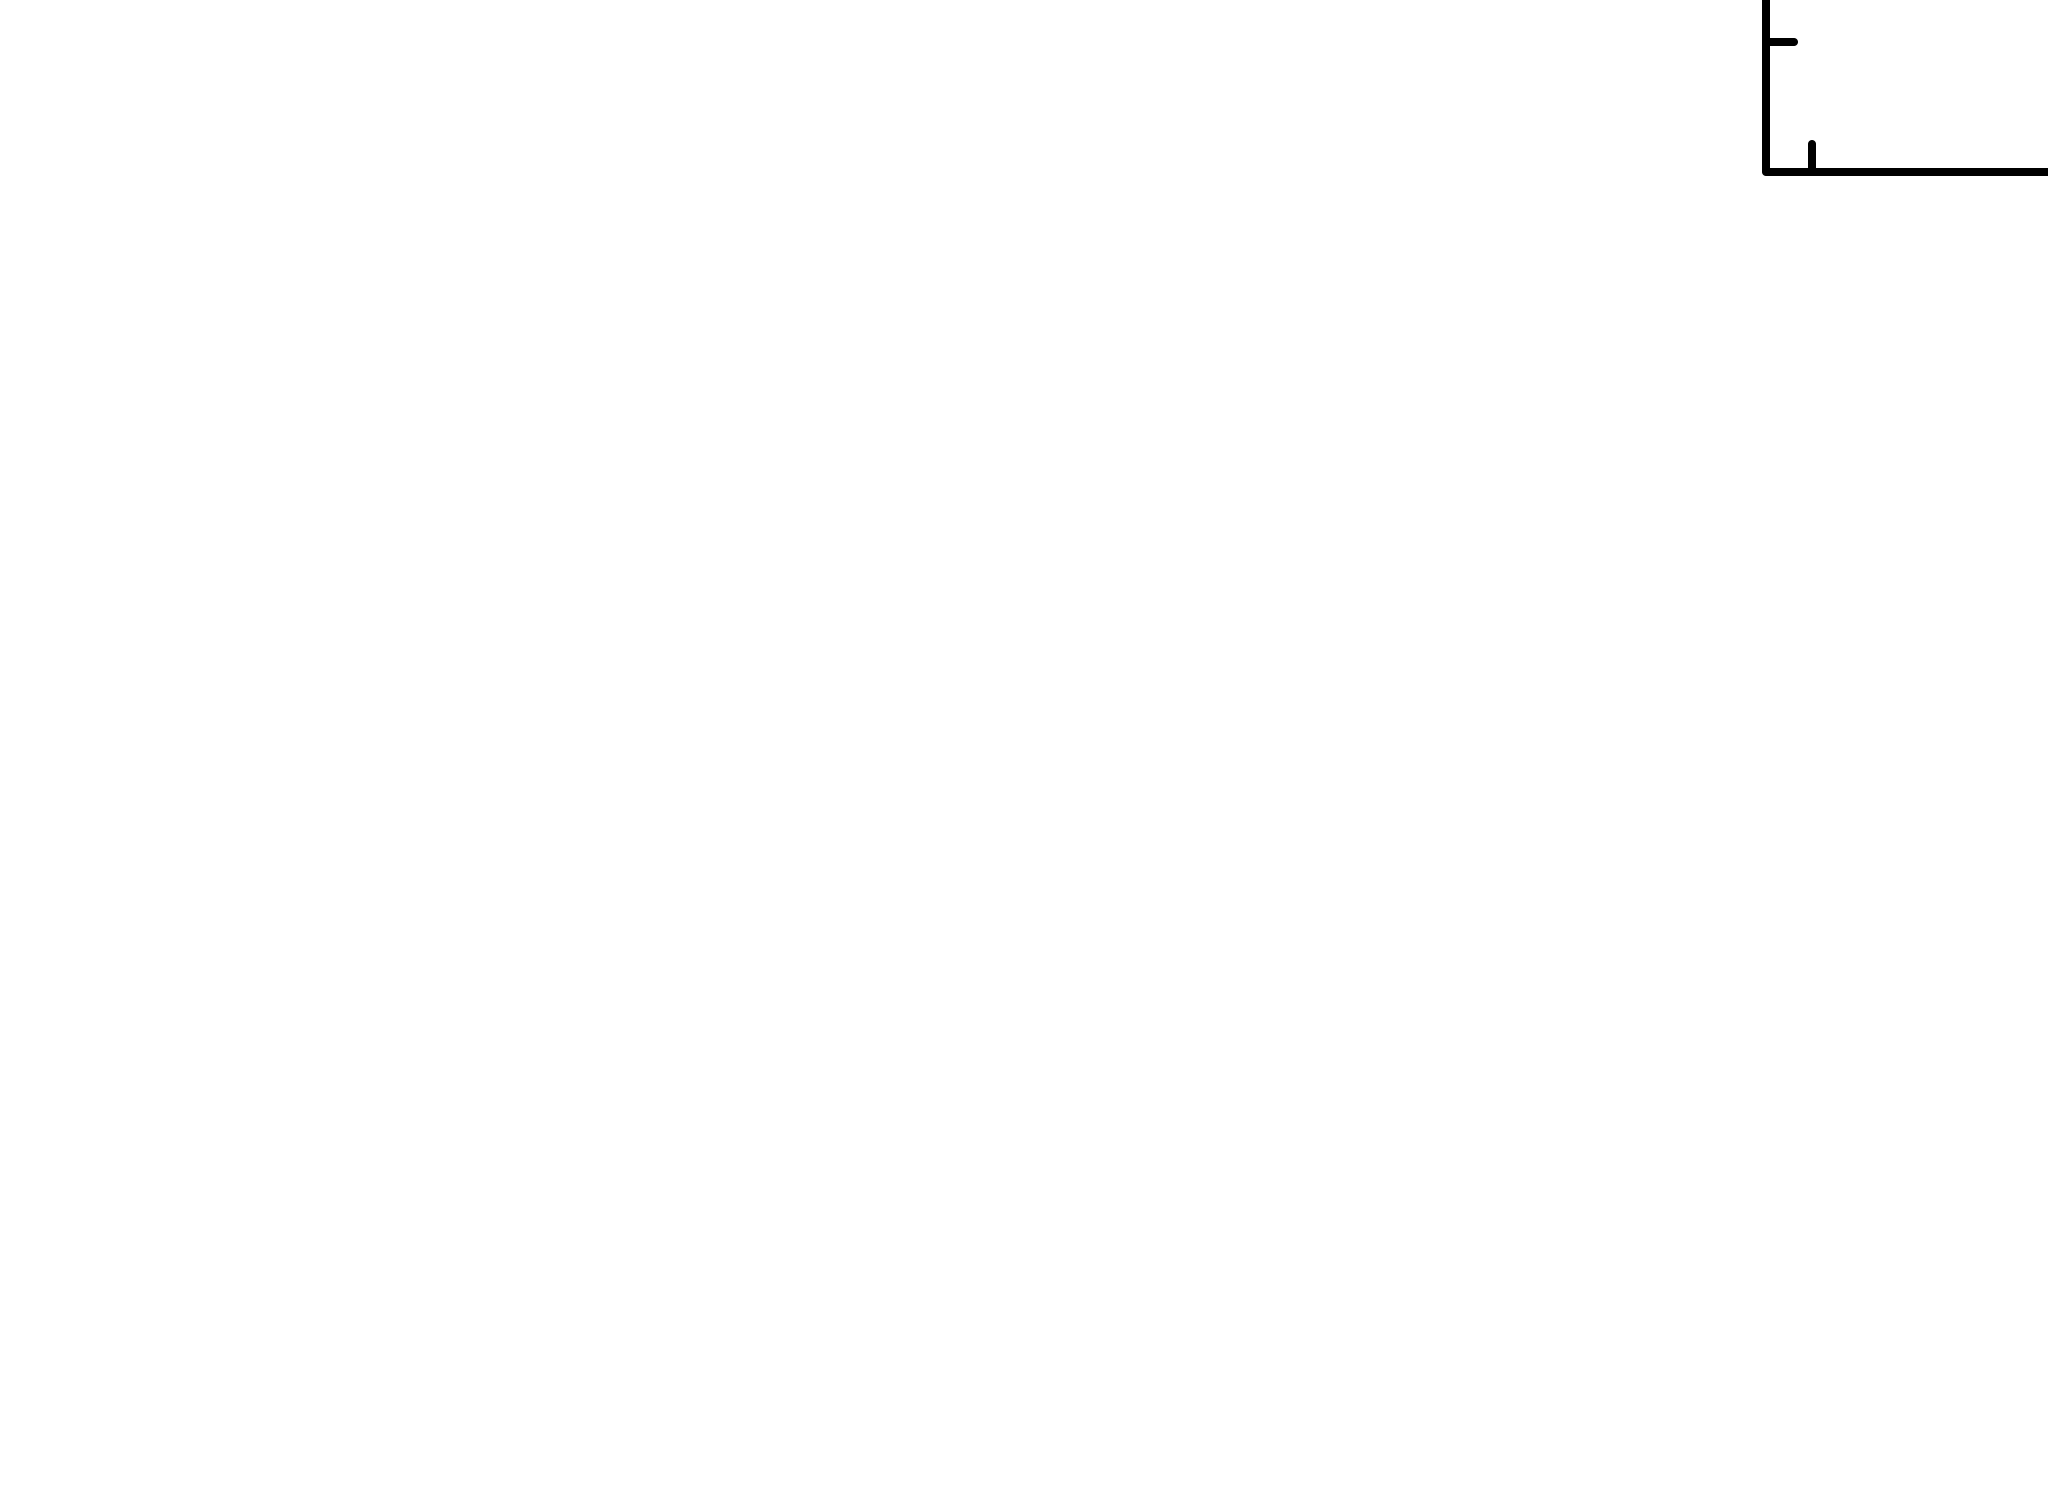

In [10]:
AllModels.clear()
mo = Model("tbabs*bremss")
Fit.perform()
Plot("data resid")


Model TBabs<1>*apec<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   apec       kT         keV      1.00000      +/-  0.0          
   3    2   apec       Abundanc            1.00000      frozen
   4    2   apec       Redshift            0.0          frozen
   5    2   apec       norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : Chi-Squared              1.343250e+10     using 13 bins.

Test statistic : Chi-Squared              1.343250e+10     using 13 bins.
 Null hypothesis probability of 0.000000e+00 with 10 degrees of freedom
 Current data and model not fit yet.
                                   Parameters
Chi-Squared  |beta|/N    Lvl          1:nH          2:kT        5:norm
23.2725      0.0298256    -3      0.424878       35.2326   1.07284e-06
18.3164      58347

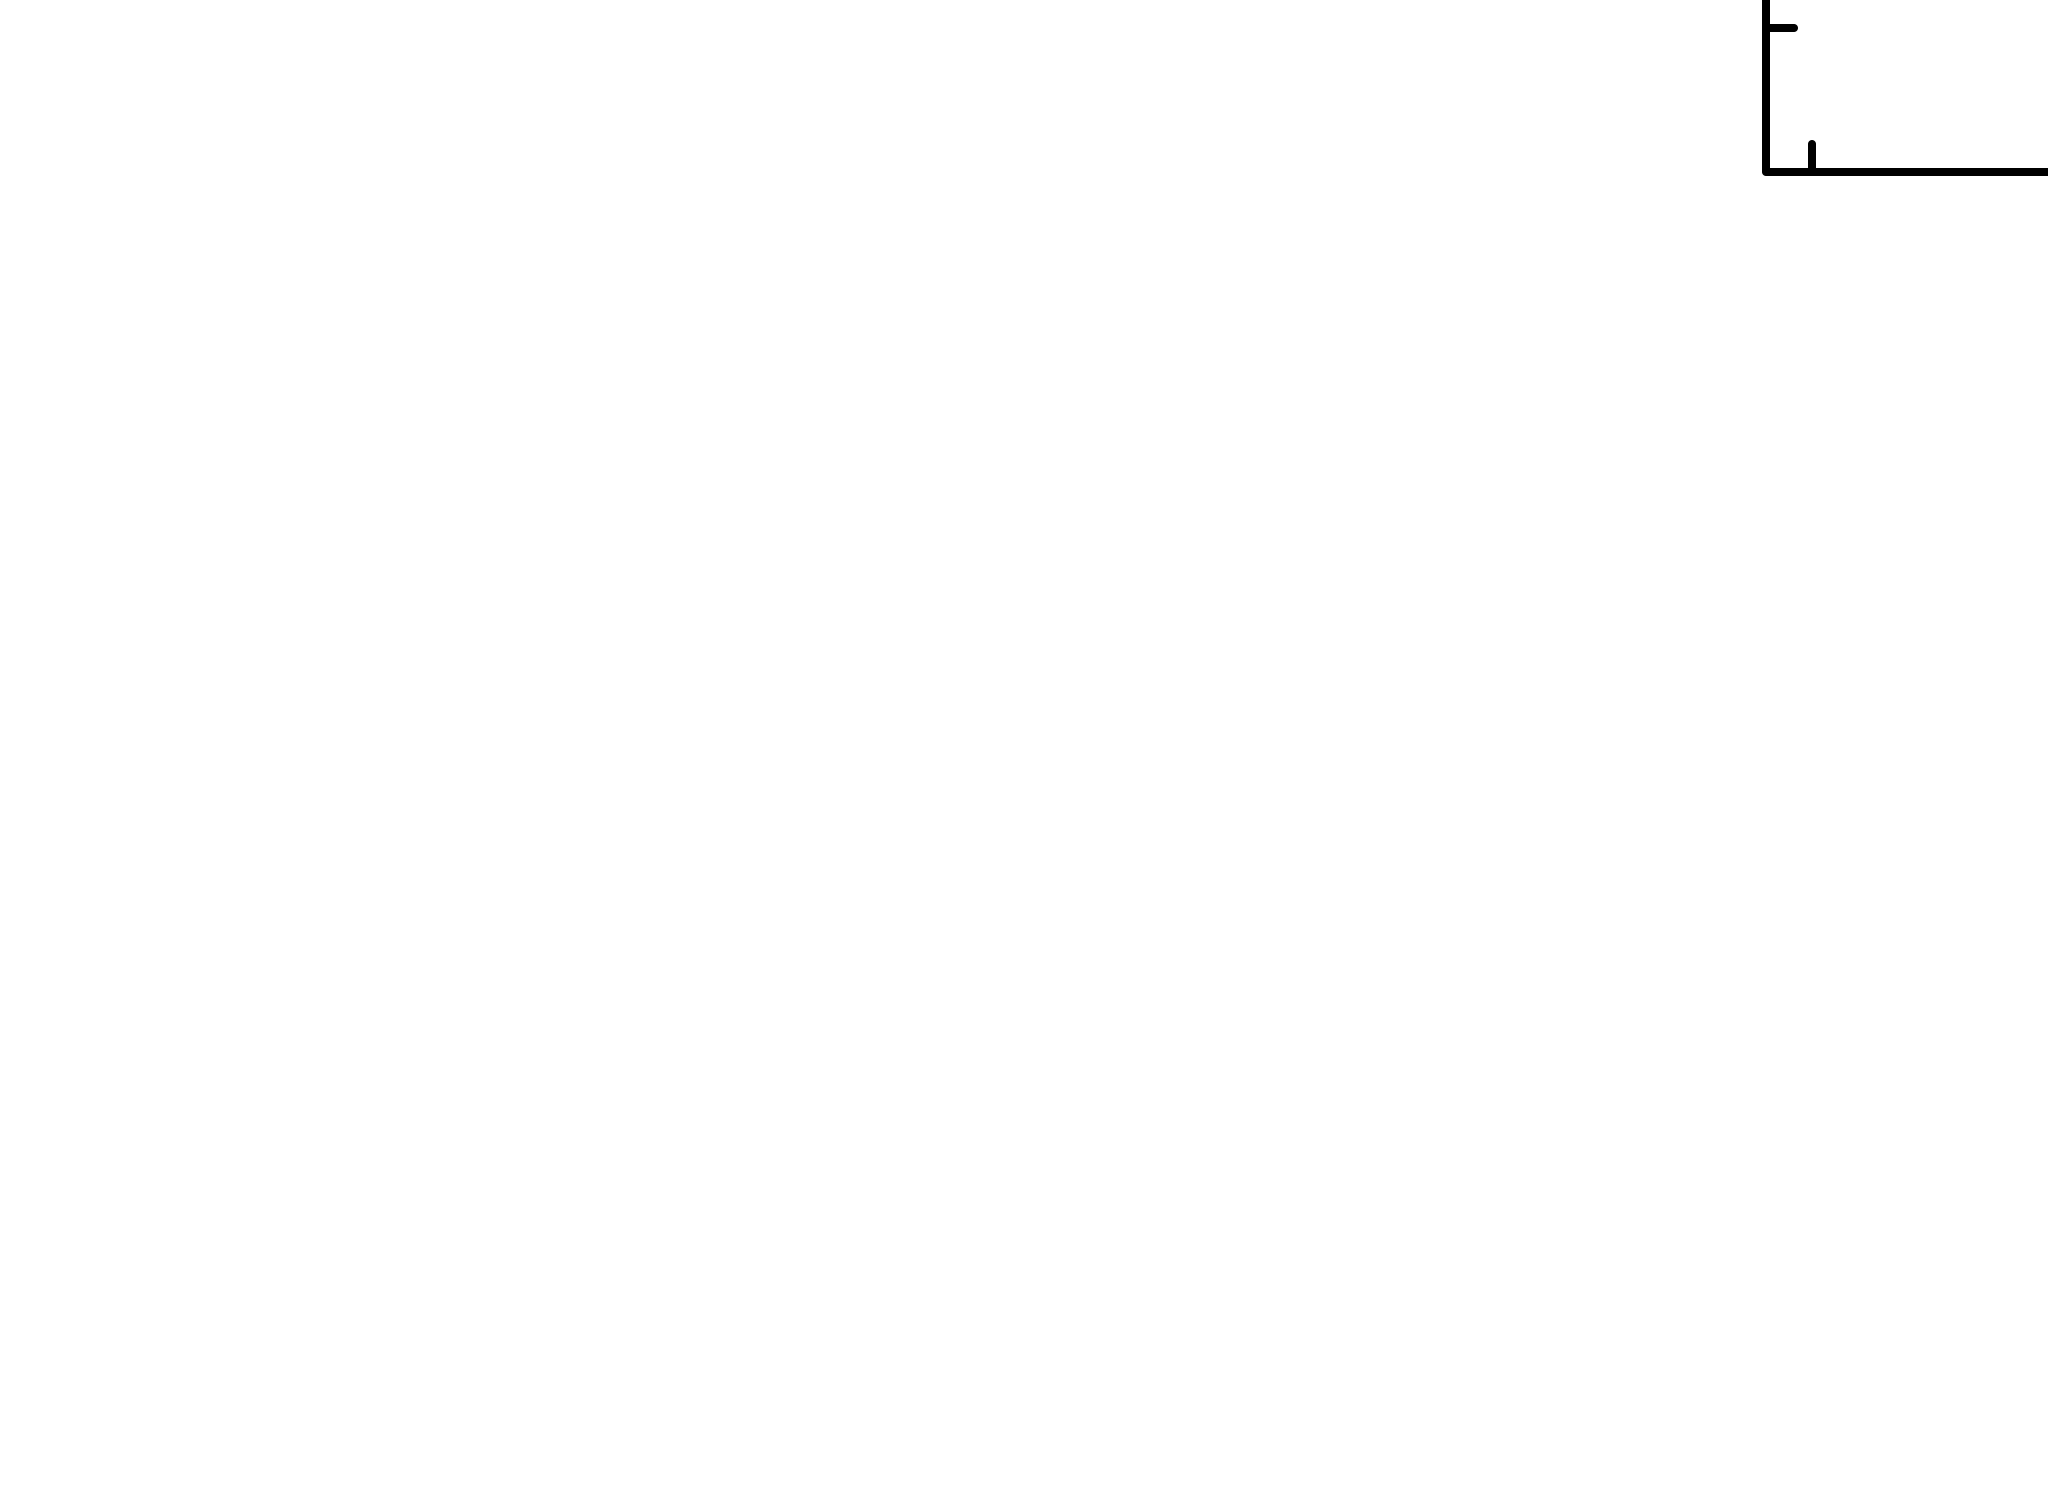

In [11]:
AllModels.clear()
mo = Model("tbabs*apec")
Fit.perform()
Plot("data resid")


Model TBabs<1>*bbody<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   bbody      kT         keV      3.00000      +/-  0.0          
   3    2   bbody      norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : Chi-Squared              6.628544e+11     using 13 bins.

Test statistic : Chi-Squared              6.628544e+11     using 13 bins.
 Null hypothesis probability of 0.000000e+00 with 10 degrees of freedom
 Current data and model not fit yet.
                                   Parameters
Chi-Squared  |beta|/N    Lvl          1:nH          2:kT        3:norm
7.01697      0.201259     -3       4.71079       1.23887   2.32406e-06
5.79093      505851       -4       7.46777       1.18763   2.55316e-06
5.6947       27162.1      -5       10.2050       1.04256   2.96950e-06
5

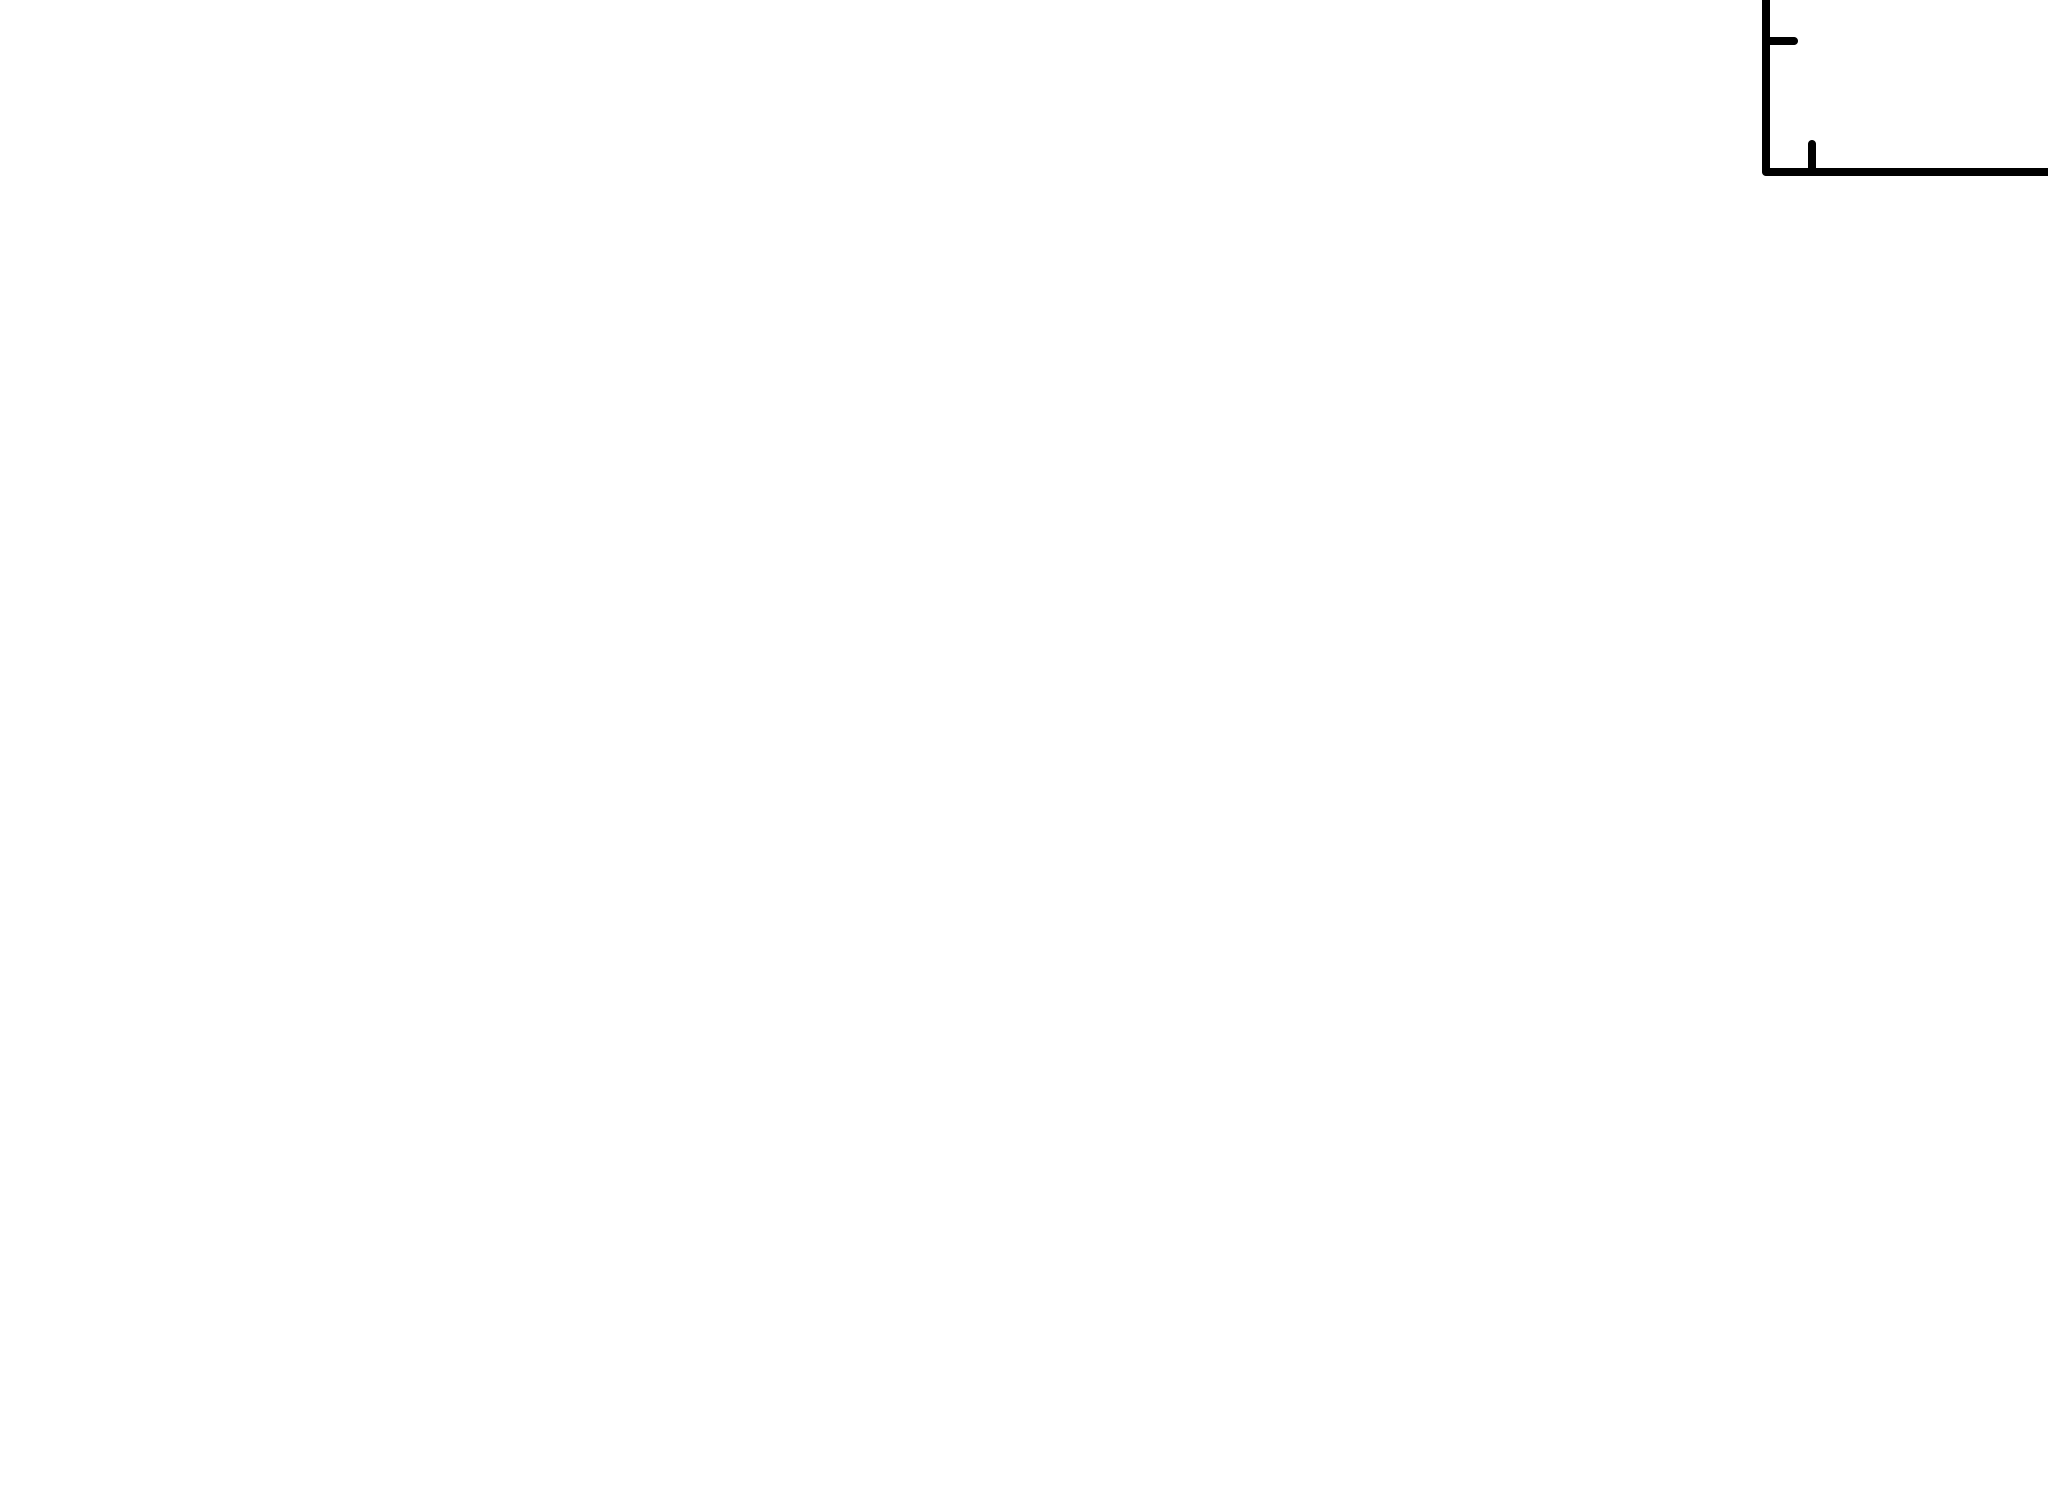

In [12]:
AllModels.clear()
mo = Model("tbabs*bbody")
Fit.perform()
Plot("data resid")

In [13]:
AllModels.calcFlux(".2 12.0")

 Model Flux 1.2979e-05 photons (1.0281e-13 ergs/cm^2/s) range (0.20000 - 12.000 keV)


In [14]:
# AllData.clear()
# AllModels.clear()
# spec = Spectrum(spec_files[2])

# Plot.device="/svg"
# Plot.xAxis="keV"
# Plot.xLog=True
# Plot.yLog=True
# Plot.addCommand("Rescale Y 0.00001 0.001")
# Plot("data")
# #spec.ignore("**-0.2 12.0-**")

In [15]:
# AllData.clear()
# AllModels.clear()
# spec = Spectrum(spec_files[3])

# Plot.device="/svg"
# Plot.xAxis="keV"
# Plot.xLog=True
# Plot.yLog=True
# Plot.addCommand("Rescale Y 0.00001 0.001")
# Plot("data")
# spec.ignore("**-0.2 12.0-**")


1 spectrum  in use
 
Spectral Data File: P0886070401PNS003SRSPEC0004.FTZ  Spectrum 1
Net count rate (cts/s) for Spectrum:1  6.980e-03 +/- 8.858e-04 (42.4 % total)
 Assigned to Data Group 1 and Plot Group 1
  Noticed Channels:  1-17
  Telescope: XMM Instrument: EPN  Channel Type: PI
  Exposure Time: 2.195e+04 sec
 Using fit statistic: chi
 Using Background File                P0886070401PNS003BGSPEC0004.FTZ
  Background Exposure Time: 2.195e+04 sec
 Using Response (RMF) File            epn_e3_ff20_sdY5.rmf for Source 1
 Using Auxiliary Response (ARF) File  P0886070401PNS003SRCARF0004.FTZ

Net count rate (cts/s) for Spectrum:1  6.980e-03 +/- 8.858e-04 (42.4 % total)
Spectrum 1  Spectral Data File: P0886070401PNS003SRSPEC0004.FTZ
Net count rate (cts/s) for Spectrum:1  6.980e-03 +/- 8.858e-04 (42.4 % total)
 Assigned to Data Group 1 and Plot Group 1
  Noticed Channels:  1-17
  Telescope: XMM Instrument: EPN  Channel Type: PI
  Exposure Time: 2.195e+04 sec
 Using fit statistic: chi
 Using 

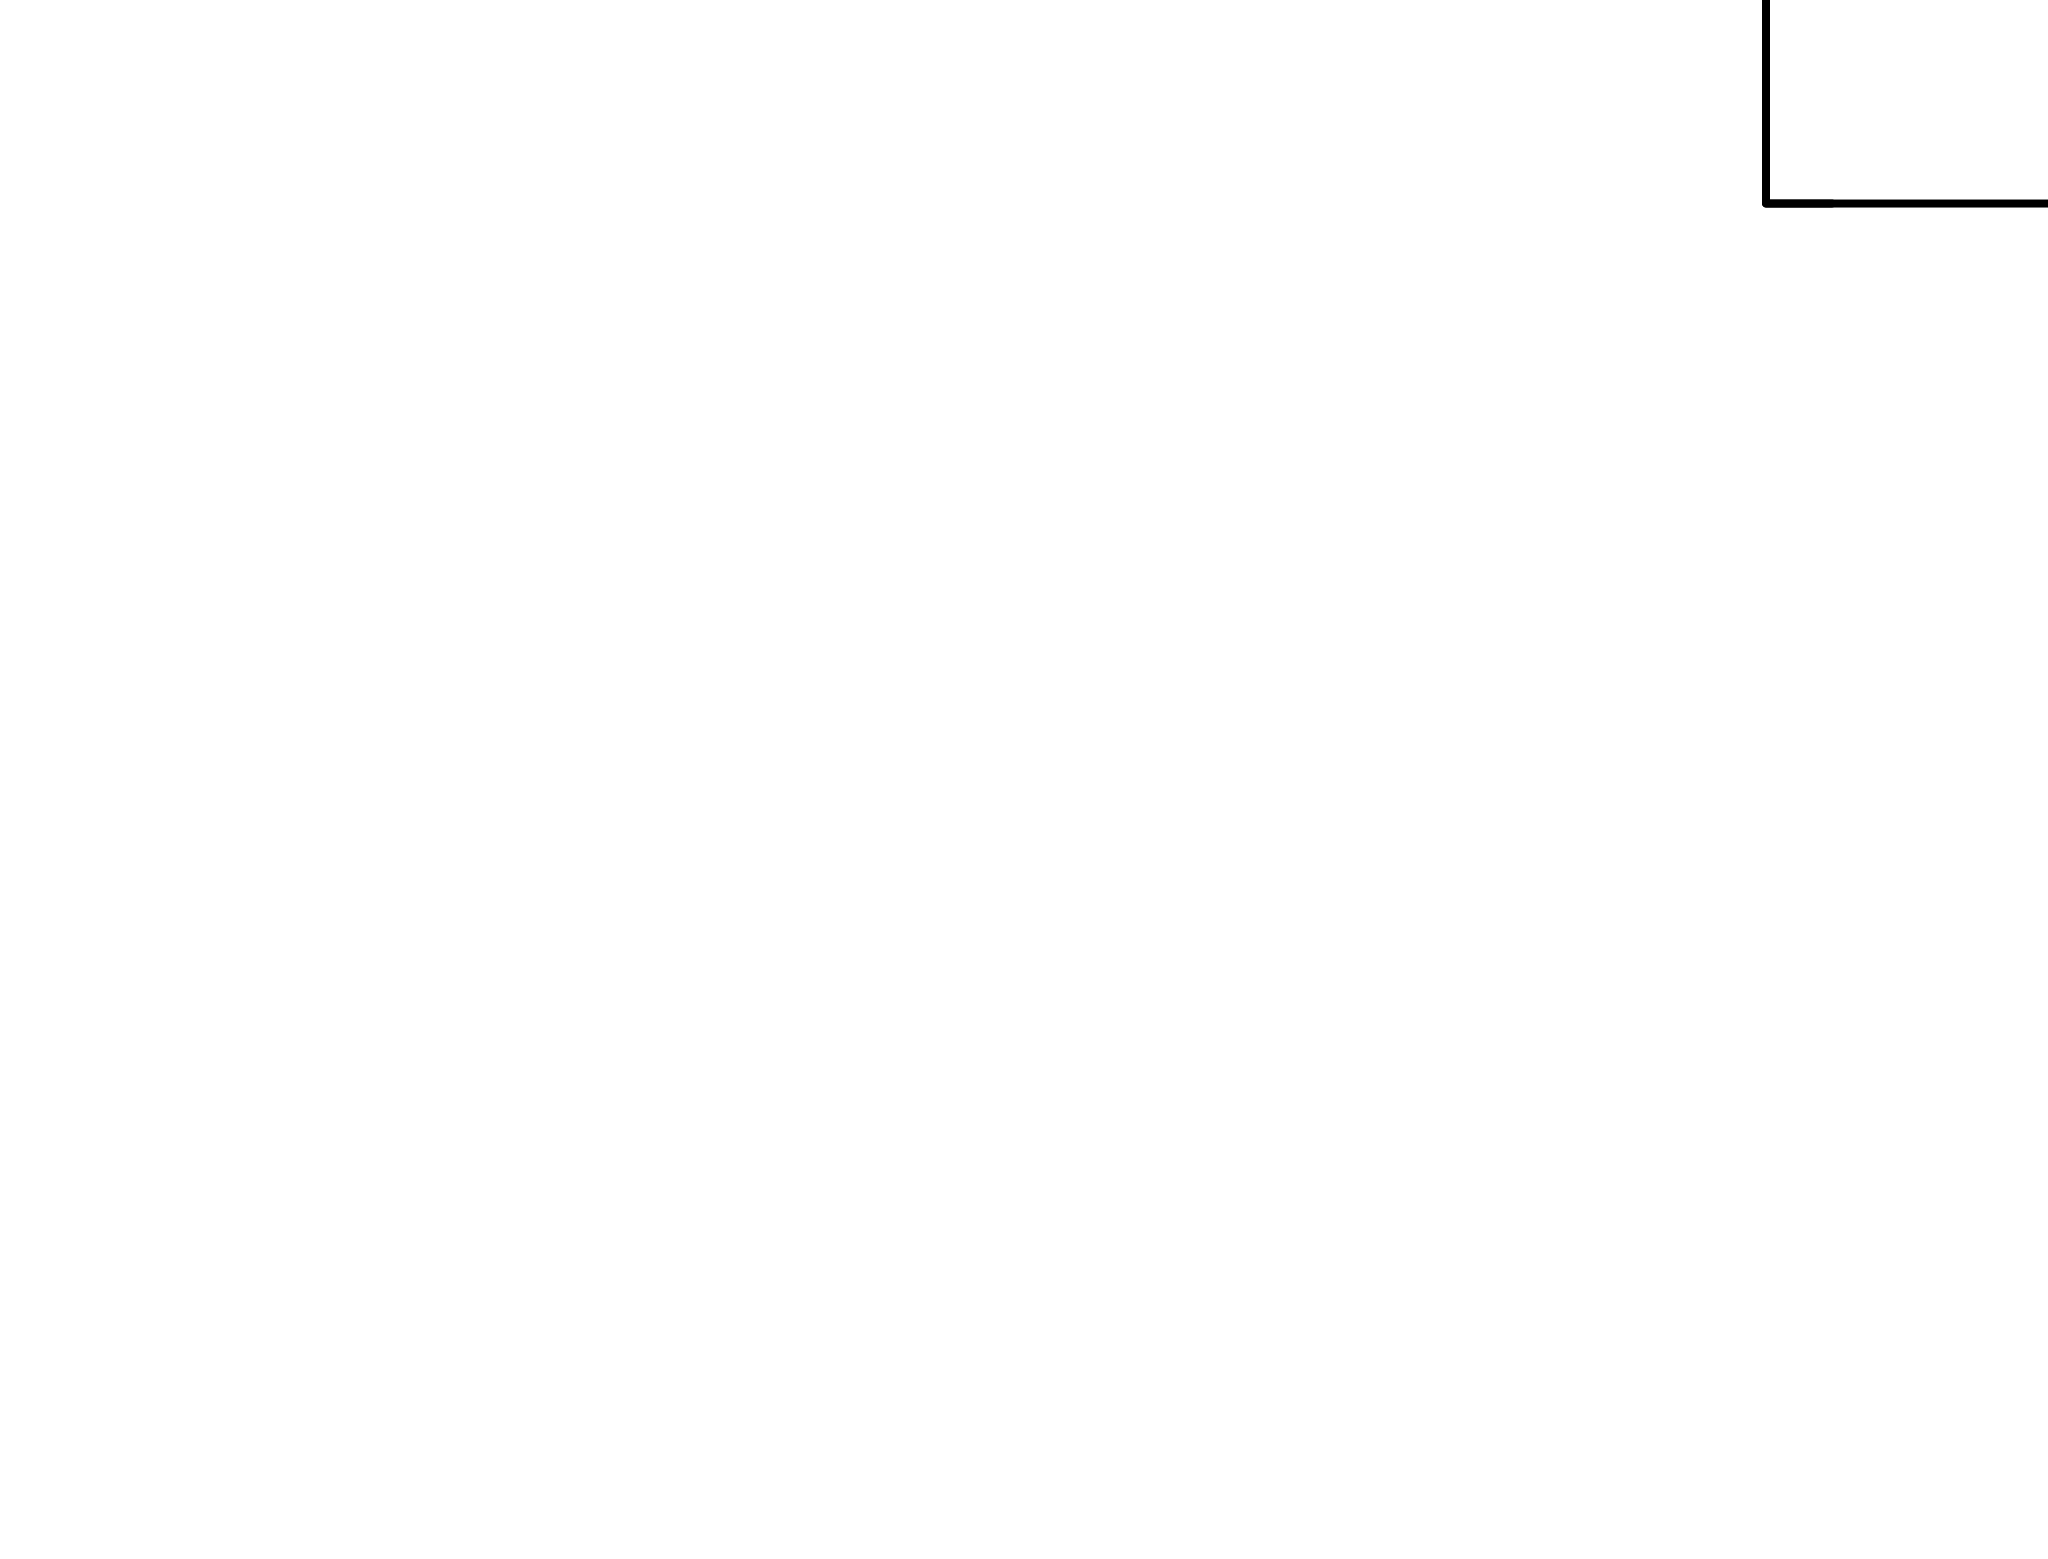

      No channels ignored (no channels in specified range)
     1 channels (17) ignored in spectrum #     1



In [16]:
AllData.clear()
AllModels.clear()
spec = Spectrum('P0886070401PNS003SRSPEC0004.FTZ',backFile='P0886070401PNS003BGSPEC0004.FTZ')

Plot.device="/svg"
Plot.xAxis="keV"
Plot.xLog=True
Plot.yLog=True
Plot.addCommand("Rescale Y 0.00001 0.01")
Plot("data")
spec.ignore("**-0.2 12.0-**")


Model TBabs<1>*bbody<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   bbody      kT         keV      3.00000      +/-  0.0          
   3    2   bbody      norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : Chi-Squared              2.037221e+12     using 16 bins.

Test statistic : Chi-Squared              2.037221e+12     using 16 bins.
 Null hypothesis probability of 0.000000e+00 with 13 degrees of freedom
 Current data and model not fit yet.
                                   Parameters
Chi-Squared  |beta|/N    Lvl          1:nH          2:kT        3:norm
16.304       0.820321     -1       2.45152       2.57447   4.99361e-06
13.2813      14063.5      -1       3.55814       2.10811   3.93580e-06
9.63667      147504       -1       4.77797       1.60701   3.15580e-06
7

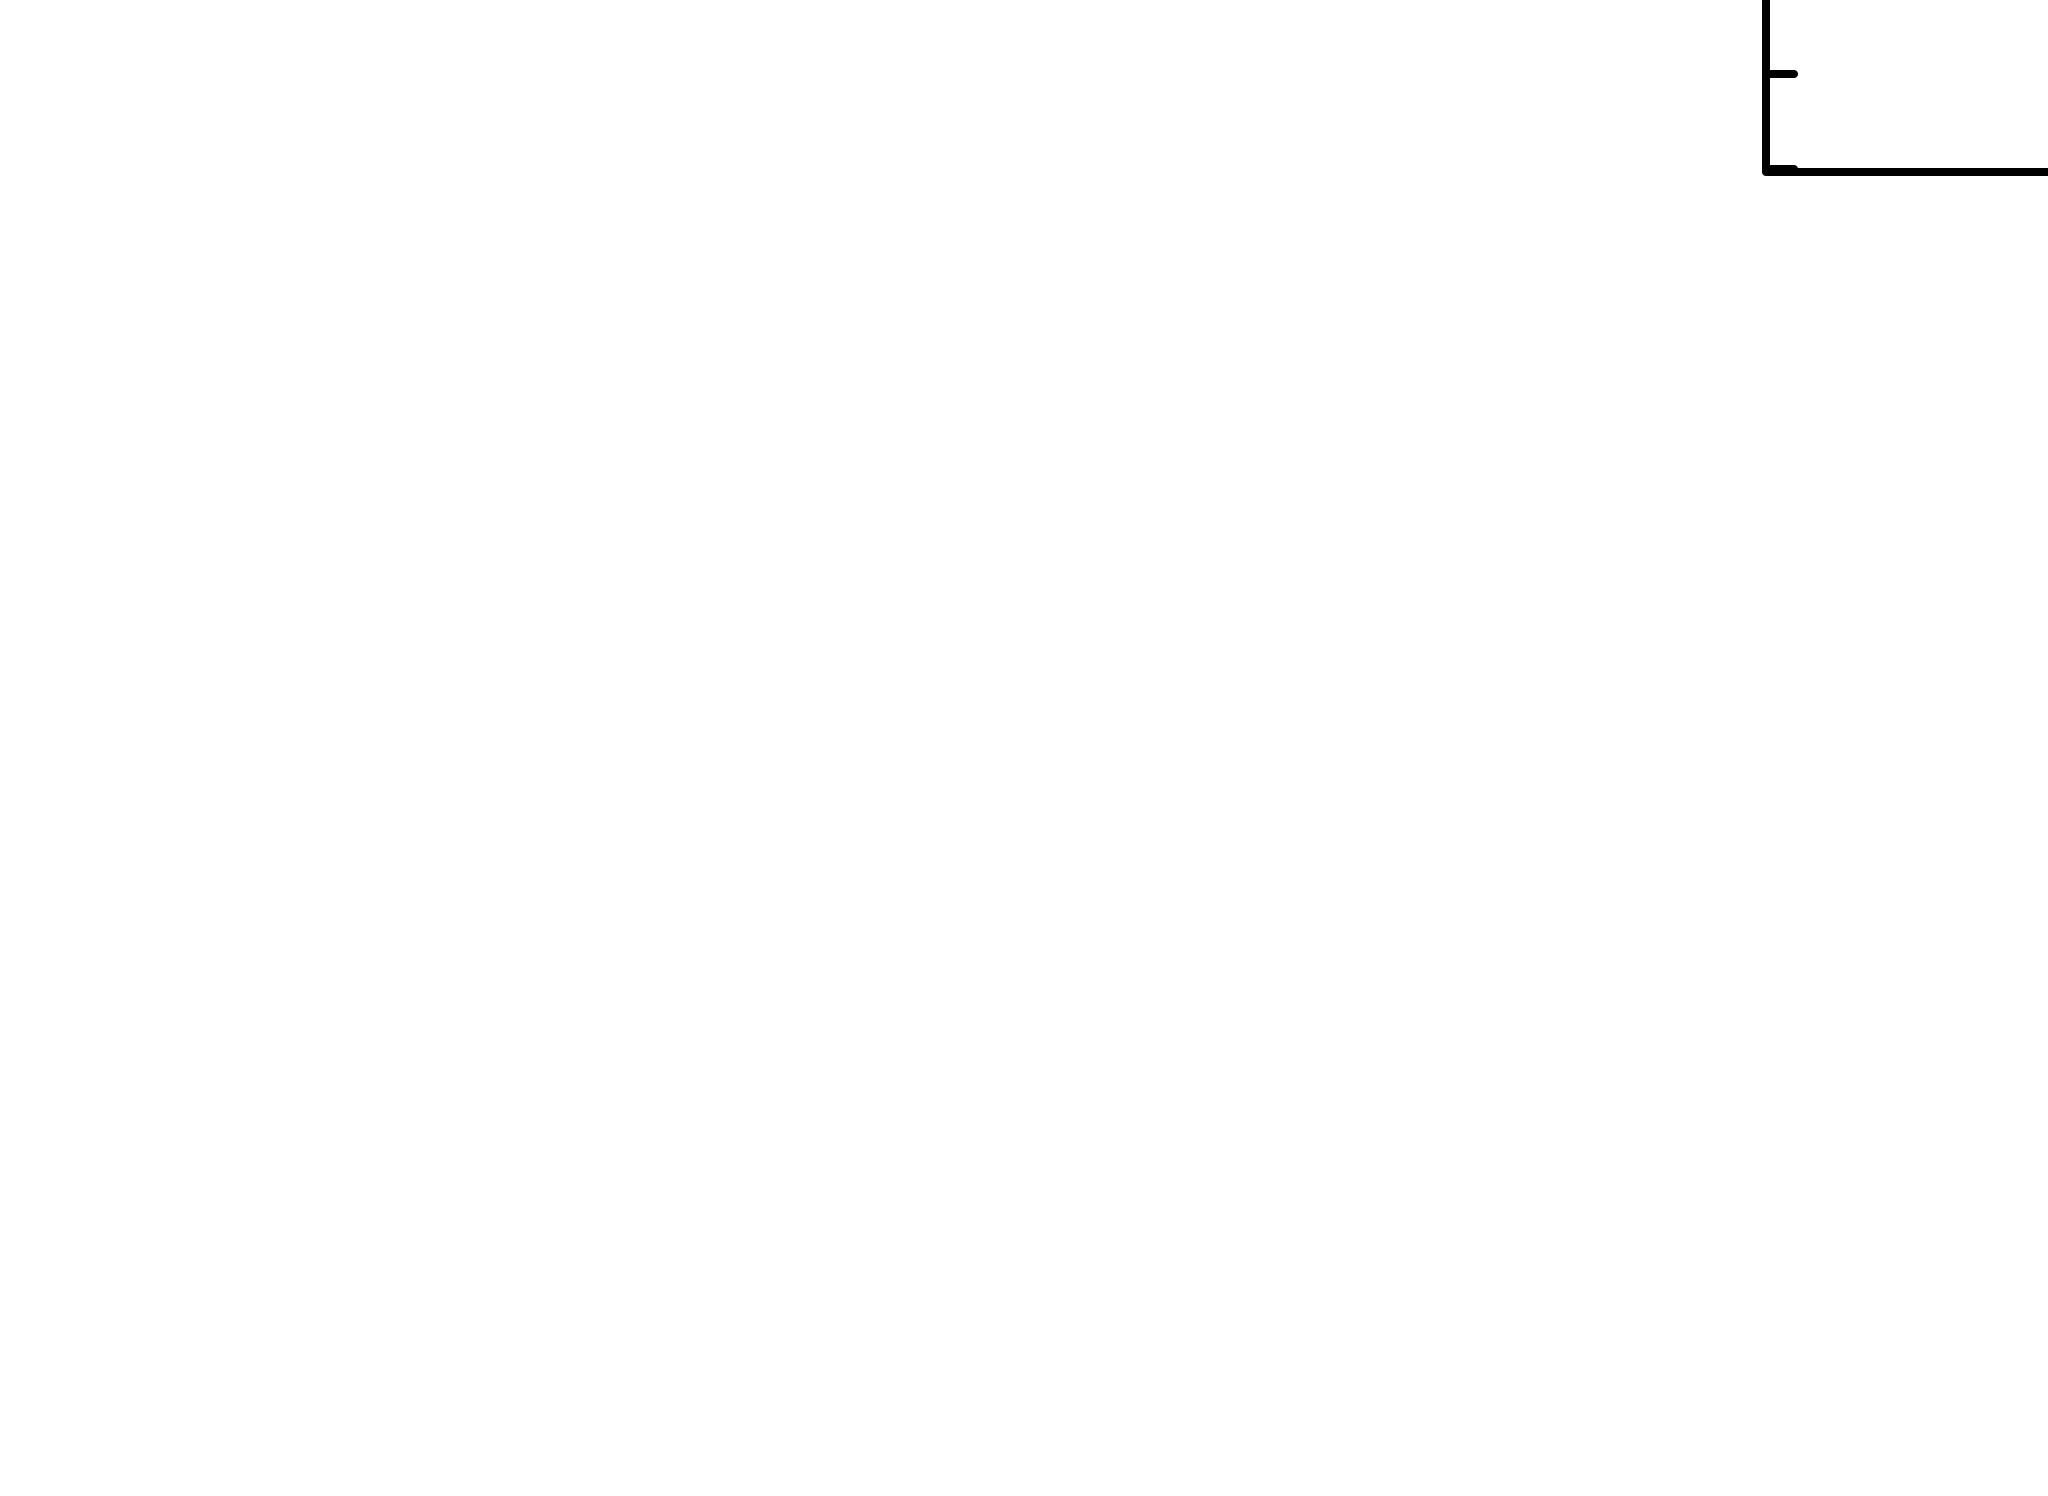

In [17]:
AllModels.clear()
mo = Model("tbabs*bbody")
Fit.perform()
Plot("data resid")


Model TBabs<1>*bremss<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   bremss     kT         keV      7.00000      +/-  0.0          
   3    2   bremss     norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : Chi-Squared              1.534555e+11     using 16 bins.

Test statistic : Chi-Squared              1.534555e+11     using 16 bins.
 Null hypothesis probability of 0.000000e+00 with 13 degrees of freedom
 Current data and model not fit yet.
                                   Parameters
Chi-Squared  |beta|/N    Lvl          1:nH          2:kT        3:norm
65.0448      2.37174       0       1.45557       42.7555   8.54523e-06
33.5177      306585       -1       6.43850       89.2145   3.72170e-05
24.1283      166305       -1       8.00935       6.51296   5.59692e-05


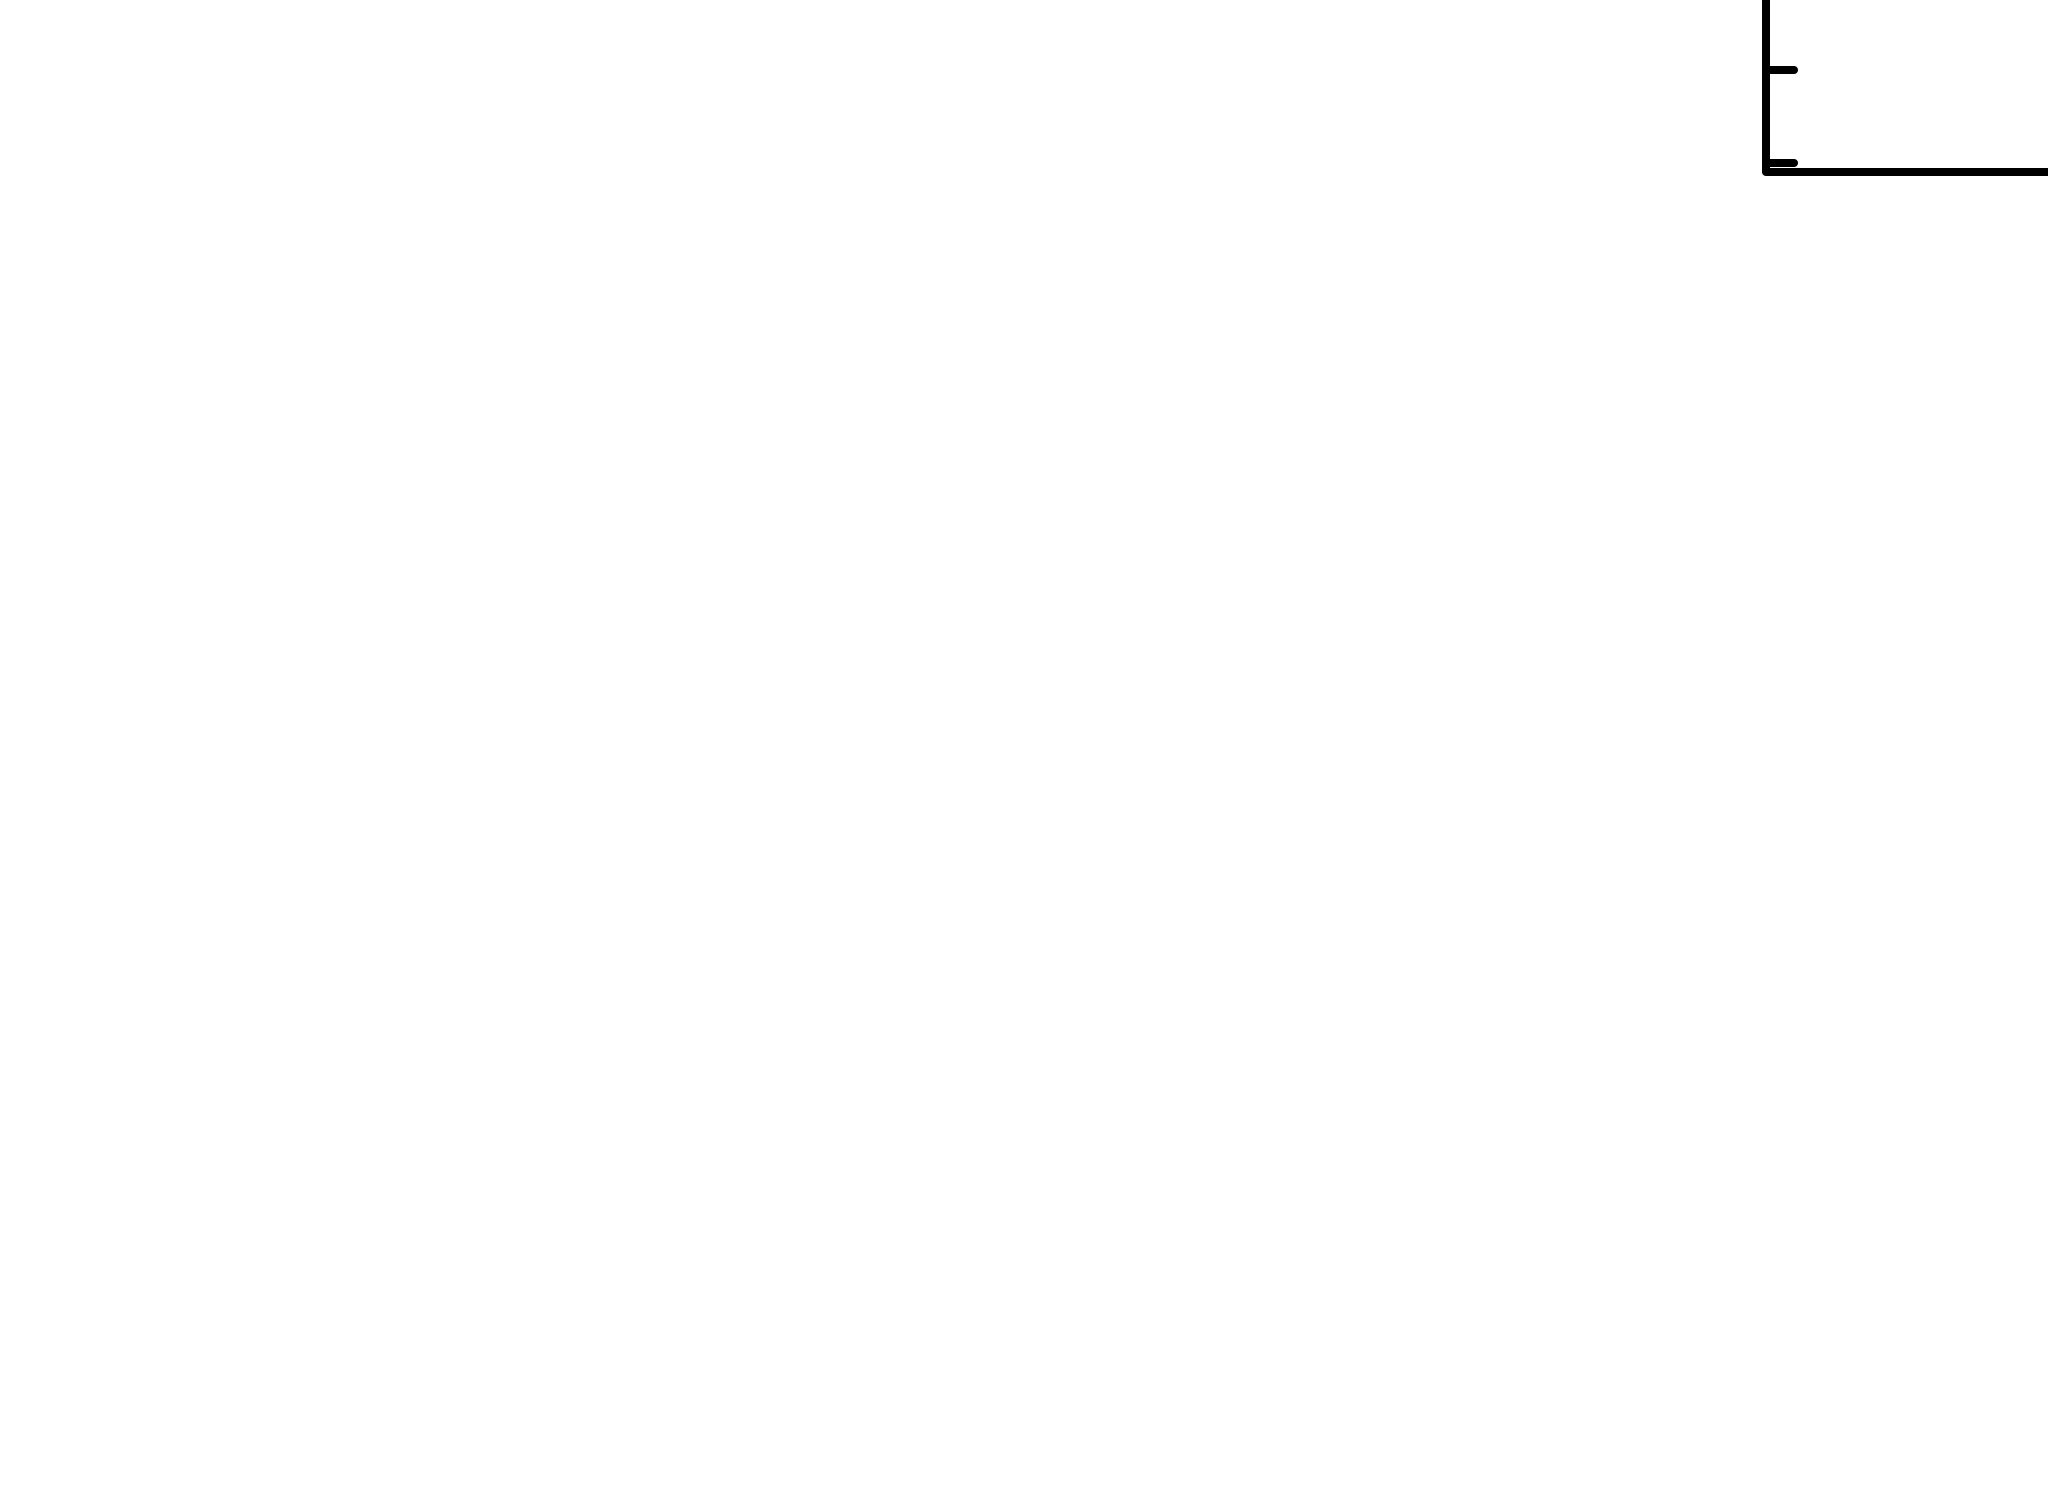

In [18]:
AllModels.clear()
mo = Model("tbabs*bremss")
Fit.perform()
Plot("data resid")


Model TBabs<1>*apec<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   apec       kT         keV      1.00000      +/-  0.0          
   3    2   apec       Abundanc            1.00000      frozen
   4    2   apec       Redshift            0.0          frozen
   5    2   apec       norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : Chi-Squared              5.932222e+10     using 16 bins.

Test statistic : Chi-Squared              5.932222e+10     using 16 bins.
 Null hypothesis probability of 0.000000e+00 with 13 degrees of freedom
 Current data and model not fit yet.
                                   Parameters
Chi-Squared  |beta|/N    Lvl          1:nH          2:kT        5:norm
85.2879      0.155874     -3      0.105676       40.2014   5.40523e-07
71.0339      21101

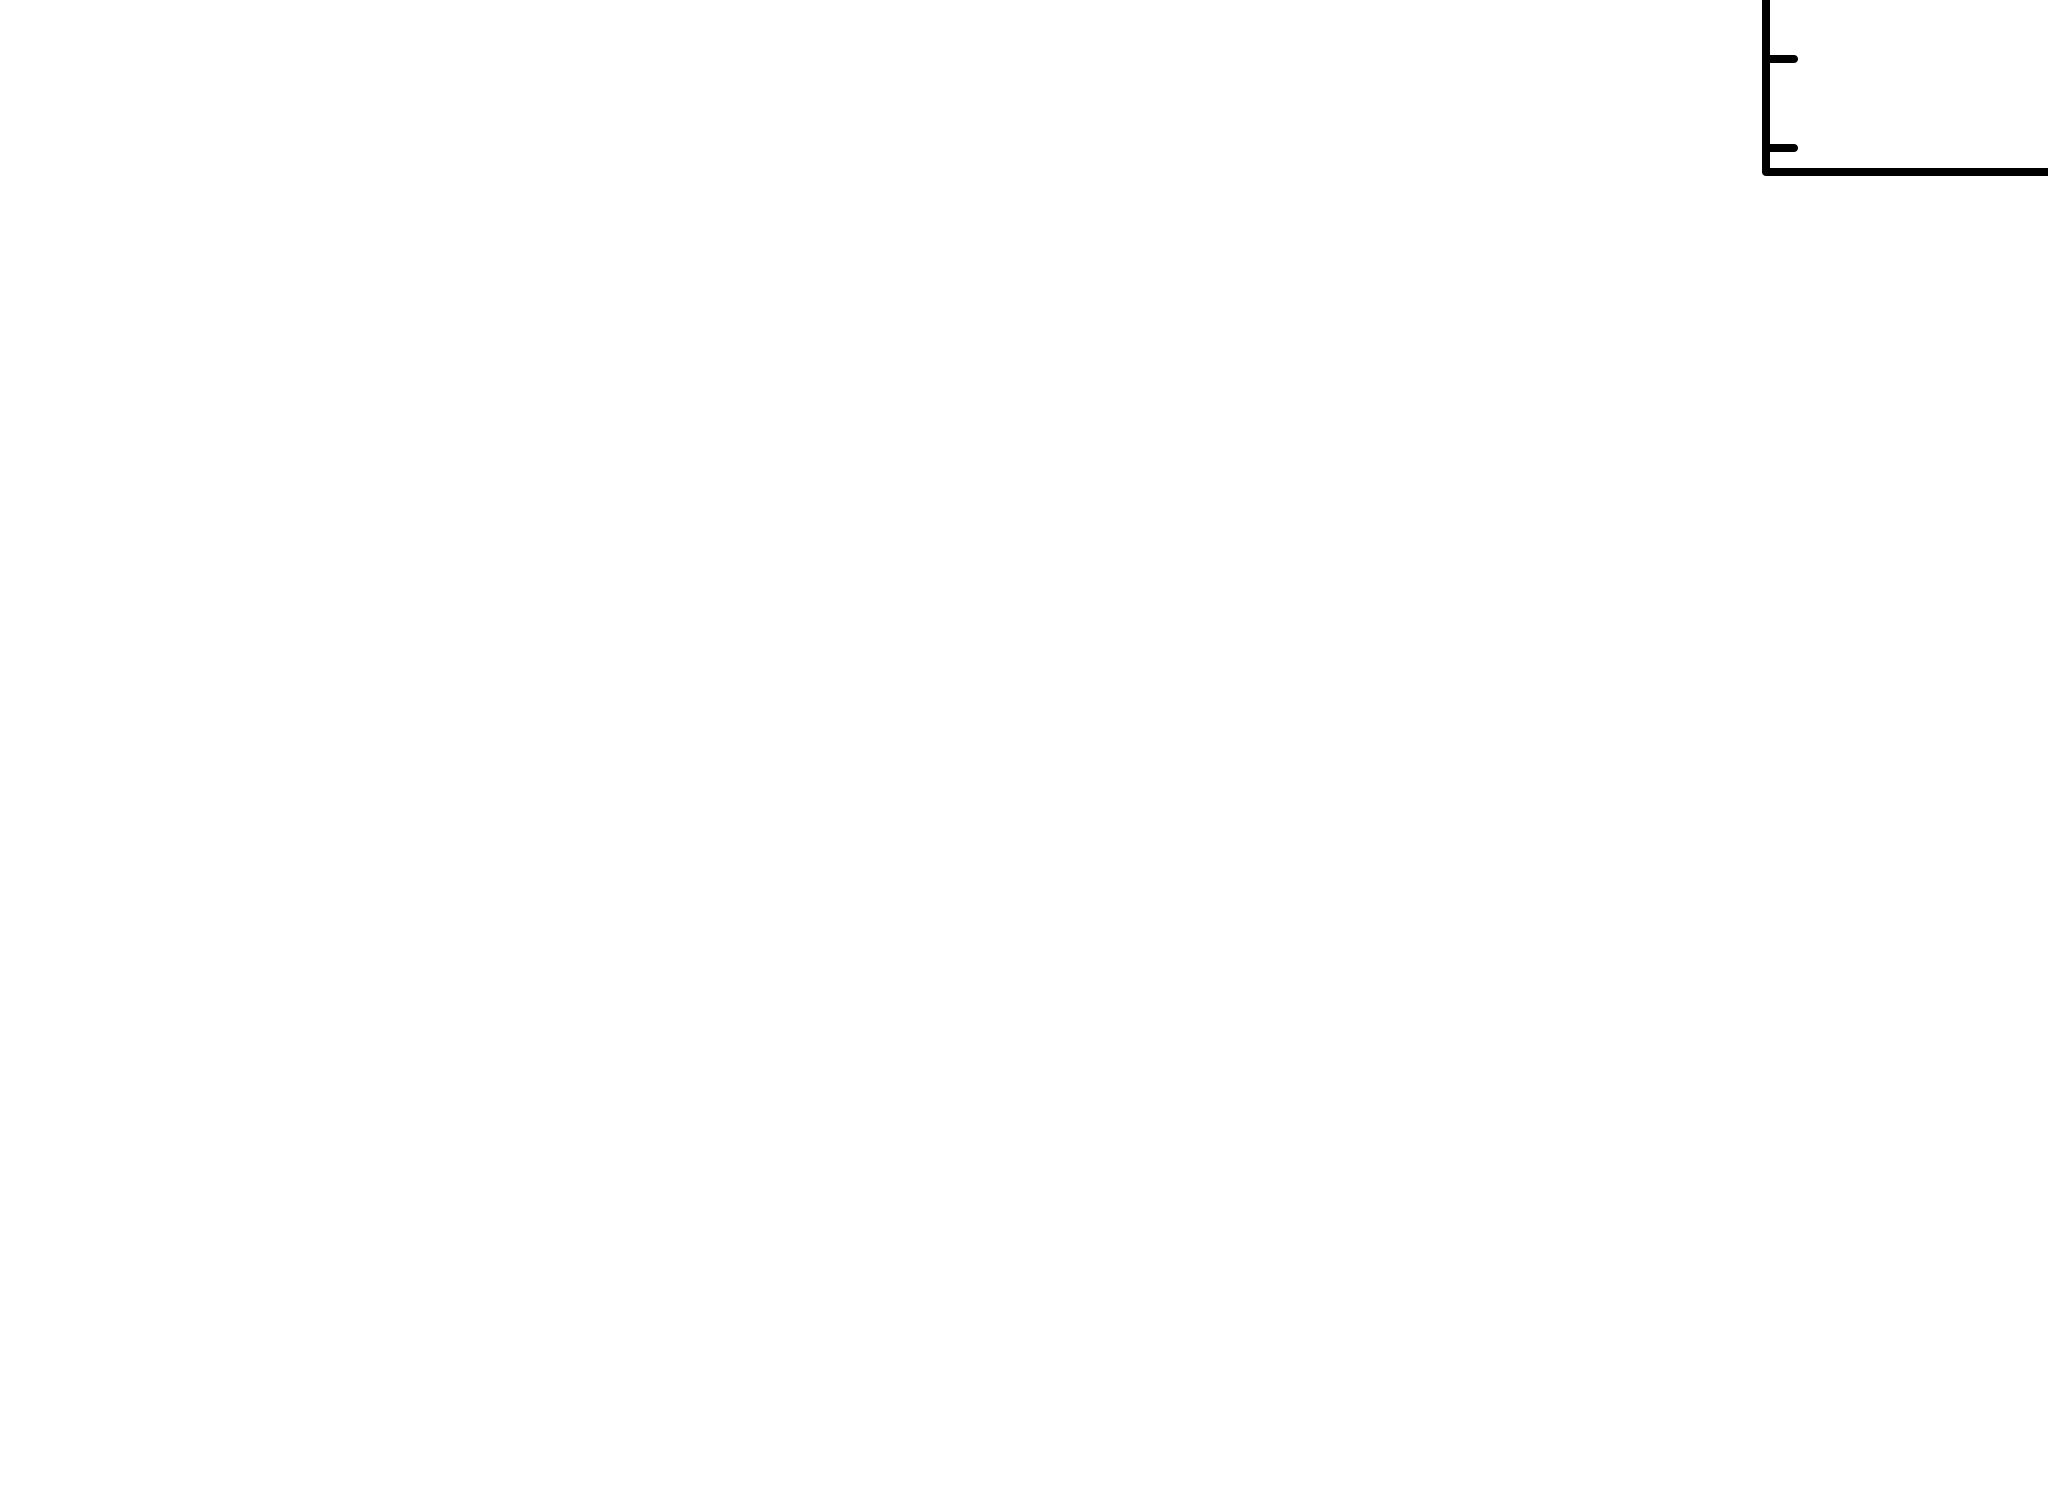

In [19]:
AllModels.clear()
mo = Model("tbabs*apec")
Fit.perform()
Plot("data resid")


Model TBabs<1>*powerlaw<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   powerlaw   PhoIndex            1.00000      +/-  0.0          
   3    2   powerlaw   norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : Chi-Squared              6.694060e+11     using 16 bins.

Test statistic : Chi-Squared              6.694060e+11     using 16 bins.
 Null hypothesis probability of 0.000000e+00 with 13 degrees of freedom
 Current data and model not fit yet.
                                   Parameters
Chi-Squared  |beta|/N    Lvl          1:nH    2:PhoIndex        3:norm
32.9861      6.73677      -3       1.11730      -1.03444   5.17446e-07
31.5012      1.07252e+06  -1      0.120959     -0.844185   6.40394e-07
29.2896      915532       -1      0.697292     -0.720754   8.12684e-0

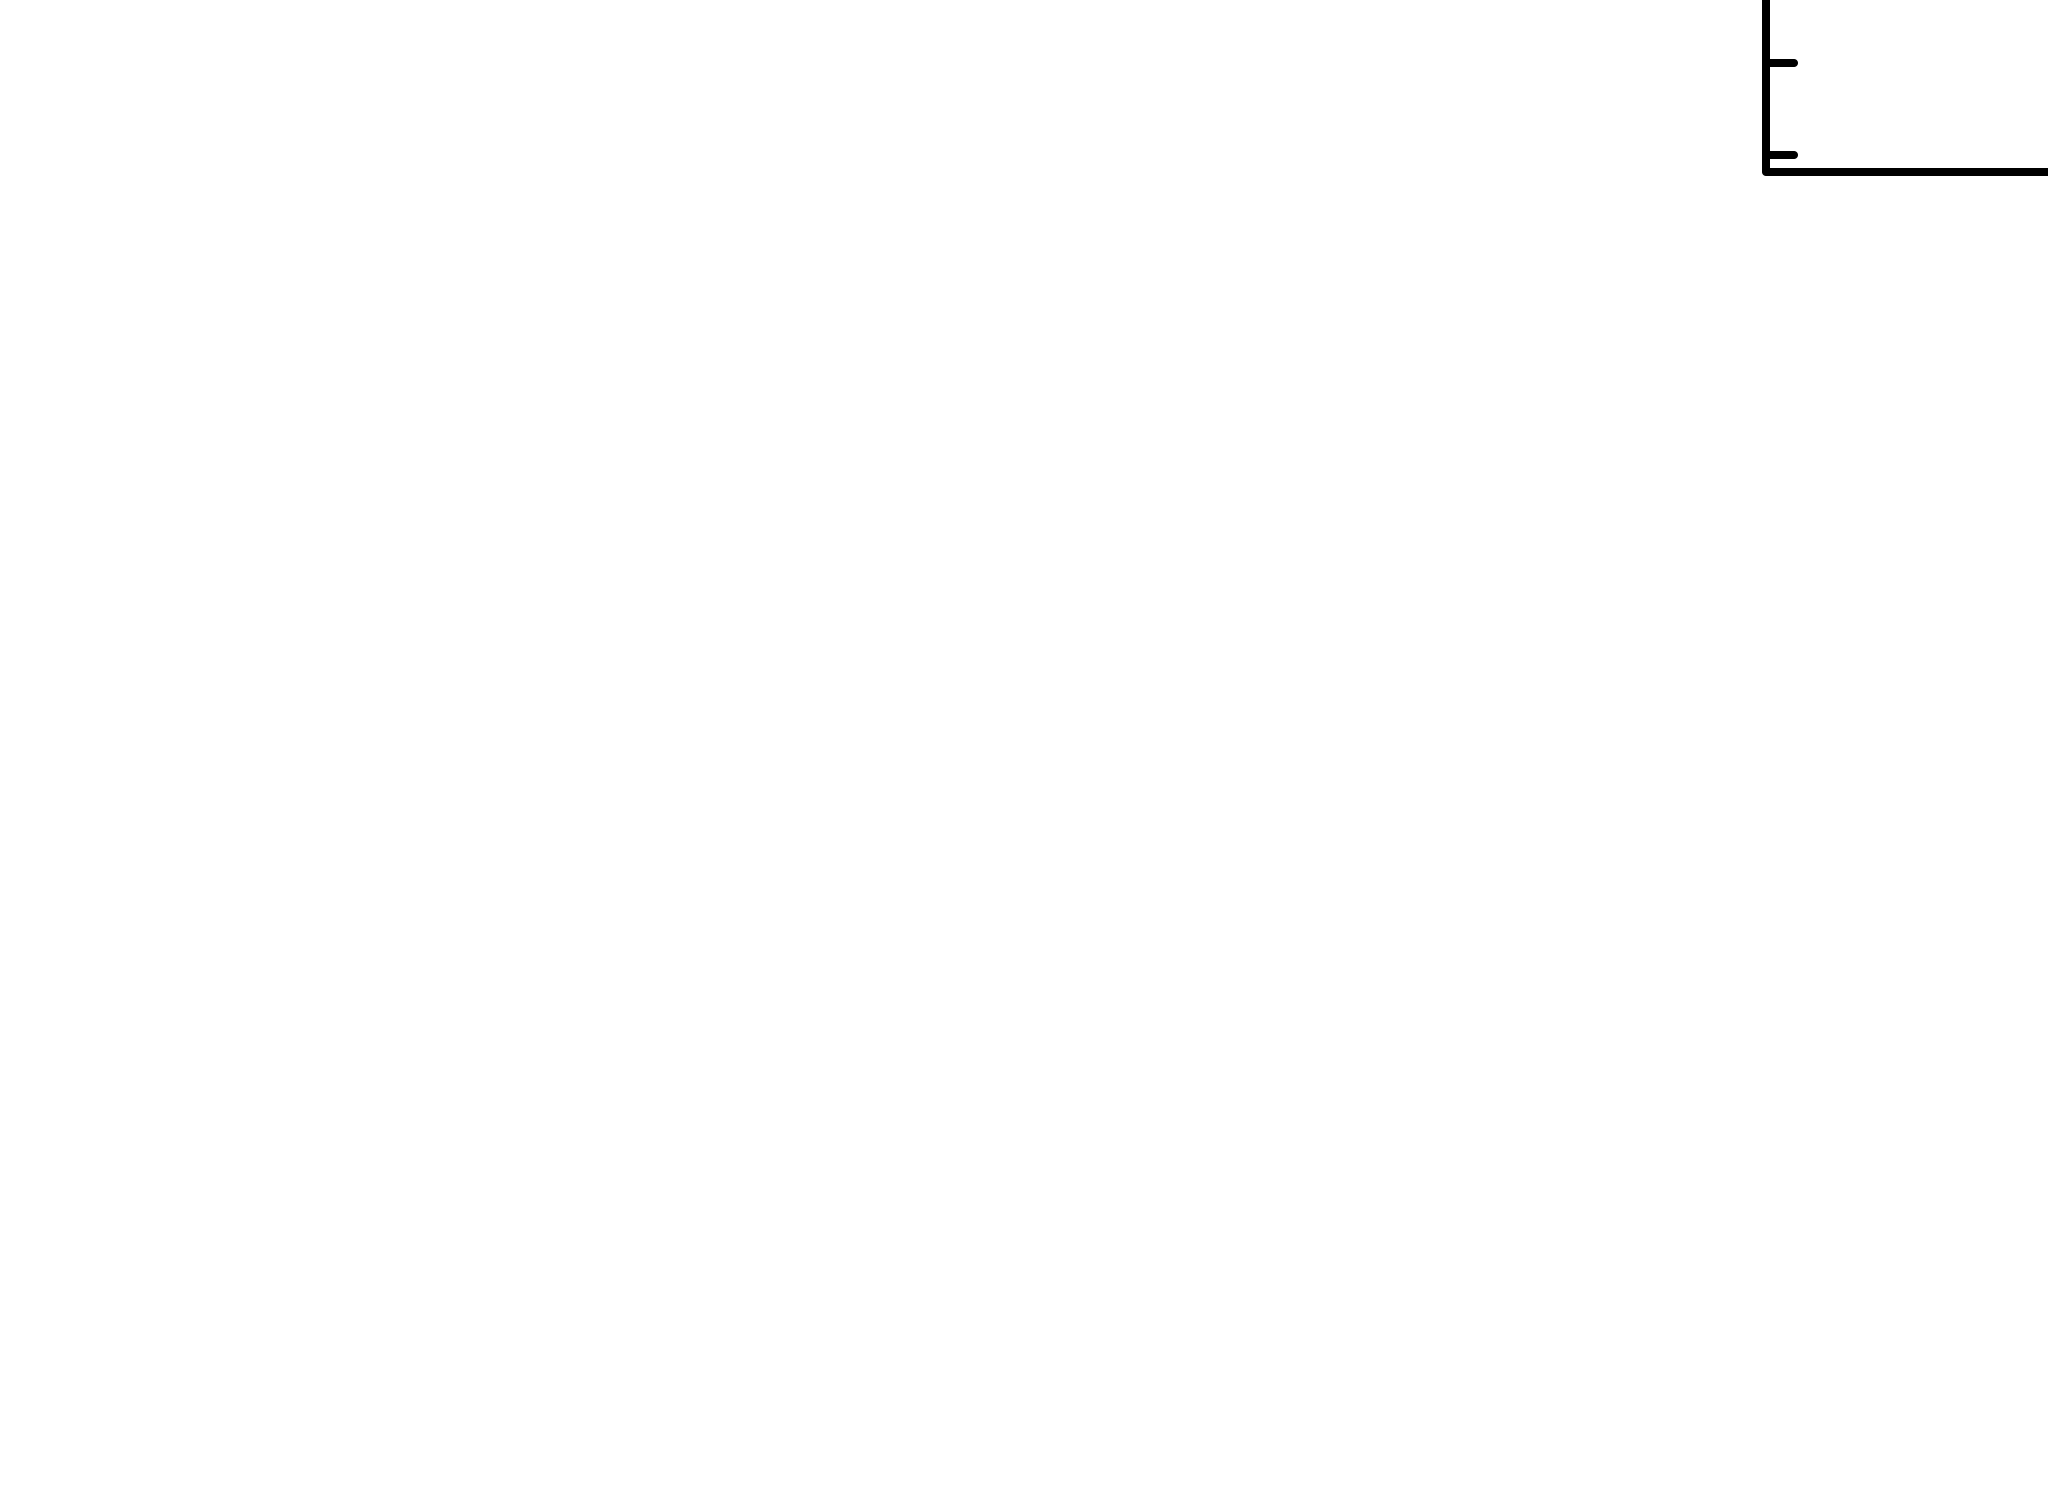

In [20]:
AllModels.clear()
mo = Model("tbabs*powerlaw")
Fit.perform()
Plot("data resid")

In [21]:
AllModels.calcFlux(".2 12.0")

 Model Flux 1.9805e-05 photons (1.6576e-13 ergs/cm^2/s) range (0.20000 - 12.000 keV)


In [24]:
#plx = 1.4843
d_kpc = 8
F_x = 2*10**-13

L_x = 4*3.14*F_x*(d_kpc*3.086*10**21)**2
print(L_x)

1.5310573281280003e+33


In [25]:
F_opt = 1.05*10**-5 * 10**(-0.4*20.78)
print('Optical Flux: ',F_opt)
print('F_x / F_opt: ', F_x/F_opt)

Optical Flux:  5.119049146085544e-14
F_x / F_opt:  3.9069755787153726
